In [22]:
import re
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize
from tqdm import tqdm
from importlib import reload

import medvqa
from medvqa.utils.files_utils import load_json
from medvqa.datasets.text_data_utils import wordpunct_tokenize_texts_in_parallel, top_k_most_similar_by_levenshtein

In [4]:
reports = load_json('/home/pamessina/ucchristus_reports.json')

In [5]:
len(reports)

105213

In [6]:
print(reports[0]['report'])

<FECHA> 
RADIOGRAFÍA DE TÓRAX PA Y LATERAL.  
Antecedentes clínicos:  
Obs derrame pleural derecho. 
Hallazgos: 
Reservorio de quimioterapia en región pectoral derecha conectado catéter de trayecto subclavio 
con extremo distal proyectado a vena cava superior. 
Caja marcapasos en región pectoral izquierda conectado a electrodos (2) con dos extremos 
distales en cavidades cardíacas derechas. 
Diafragma bien delimitado, en posición normal. 
Volúmenes pulmonares normales. 
No se observan signos de derrame pleural ni neumotórax. 
Engrosamiento del plano cisural menor derecho de aspecto inespecífico. 
No se observan focos de condensación ni masas en el parénquima pulmonar. 
Silueta cardíaca de tamaño normal. 
Aorta torácica elongada con ateromatosis cálcica en su cayado. 
Respecto a estudio radiográfico previo, de <FECHA>, se ha hecho evidente aumento de volumen 
masiforme en situación paramediana hiliar derecha que en su diagnóstico diferencial se debe 
considerar compromiso adenopático de

In [8]:
import unicodedata

def remove_accents(text):
    return ''.join(
        c for c in unicodedata.normalize('NFD', text)
        if unicodedata.category(c) != 'Mn'
    )

In [9]:
report_texts_no_accent = [remove_accents(x) for x in tqdm(report_texts)]

100%|█████████████████████████████████████████████████████████████████████████| 105213/105213 [00:23<00:00, 4433.30it/s]


In [10]:
report_texts_no_accent_lower = [x.lower() for x in tqdm(report_texts_no_accent)]

100%|███████████████████████████████████████████████████████████████████████| 105213/105213 [00:00<00:00, 754665.72it/s]


In [11]:
word_tokens_per_text = wordpunct_tokenize_texts_in_parallel(report_texts_no_accent_lower, 10, use_tqdm=True)

Wordpunct tokenizing: 100%|███████████████████████████████████████████████████| 105213/105213 [00:30<00:00, 3442.81it/s]


In [12]:
unigrams = set(word for words in word_tokens_per_text for word in words)
unigrams = list(unigrams)
len(unigrams)

10793

In [13]:
bigrams = set()
for words in word_tokens_per_text:
    for i in range(len(words)-1):
        bigram = f'{words[i]} {words[i+1]}'
        bigrams.add(bigram)
bigrams = list(bigrams)
len(bigrams)        

100731

In [14]:
trigrams = set()
for words in word_tokens_per_text:
    for i in range(len(words)-2):
        trigram = f'{words[i]} {words[i+1]} {words[i+2]}'
        trigrams.add(trigram)
trigrams = list(trigrams)
len(trigrams)

320570

In [15]:
top_k_most_similar_by_levenshtein('bacilo', unigrams, k=50, num_workers=1, use_tqdm=True)

Levenshtein: 100%|████████████████████████████████████████████████████████████| 10793/10793 [00:00<00:00, 536059.15it/s]


[('bacilo', 0),
 ('bacilos', 1),
 ('bocio', 2),
 ('acido', 2),
 ('acigo', 2),
 ('axilo', 2),
 ('nacido', 2),
 ('maculo', 2),
 ('buceo', 3),
 ('halo', 3),
 ('calcio', 3),
 ('vacuo', 3),
 ('basal', 3),
 ('aci', 3),
 ('masivo', 3),
 ('labio', 3),
 ('macro', 3),
 ('ciclo', 3),
 ('barro', 3),
 ('hilo', 3),
 ('banal', 3),
 ('cito', 3),
 ('callo', 3),
 ('bajo', 3),
 ('alo', 3),
 ('mamila', 3),
 ('bucle', 3),
 ('anillo', 3),
 ('bilio', 3),
 ('basale', 3),
 ('bucal', 3),
 ('loculo', 3),
 ('pasivo', 3),
 ('facial', 3),
 ('calculo', 3),
 ('decimo', 3),
 ('calcico', 3),
 ('daco', 3),
 ('tail', 3),
 ('basilar', 3),
 ('hacia', 3),
 ('apico', 3),
 ('habido', 3),
 ('habito', 3),
 ('radio', 3),
 ('balon', 3),
 ('papila', 3),
 ('cifo', 3),
 ('axila', 3),
 ('excito', 3)]

In [16]:
top_k_most_similar_by_levenshtein('presion elevada', bigrams, k=50, num_workers=1, use_tqdm=True)

Levenshtein: 100%|█████████████████████████████████████████████████████████| 100731/100731 [00:00<00:00, 1280598.80it/s]


[('arterial elevada', 5),
 ('lesion tratada', 6),
 ('derecho elevado', 6),
 ('lesion ovalada', 6),
 ('presion existir', 6),
 ('impresiona elongada', 6),
 ('pcr elevada', 6),
 ('vhs elevada', 6),
 ('presion de', 6),
 ('previo leve', 6),
 ('presion del', 6),
 ('precision la', 7),
 ('impresion aumentada', 7),
 ('region media', 7),
 ('previo para', 7),
 ('previos el', 7),
 ('lesion cavitada', 7),
 ('lesion solida', 7),
 ('region tenar', 7),
 ('previo sonda', 7),
 ('tres elongada', 7),
 ('progresion severa', 7),
 ('region cervica', 7),
 ('previo eran', 7),
 ('region para', 7),
 ('impresiona dada', 7),
 ('region extra', 7),
 ('previo estas', 7),
 ('presion .', 7),
 ('region vena', 7),
 ('previo osea', 7),
 ('impresiona nuevas', 7),
 ('depresion concava', 7),
 ('impresion clinica', 7),
 ('impresiona leve', 7),
 ('lesion renal', 7),
 ('presente para', 7),
 ('previo media', 7),
 ('posicion esperada', 7),
 ('region mama', 7),
 ('precision el', 7),
 ('previo las', 7),
 ('presion haber', 7),
 ('pr

In [17]:
top_k_most_similar_by_levenshtein('biventricular', trigrams, k=50, num_workers=1, use_tqdm=True)

Levenshtein: 100%|█████████████████████████████████████████████████████████| 320570/320570 [00:00<00:00, 1751093.04it/s]


[('- ventricular ,', 4),
 ('- ventricular .', 4),
 ('- ventricular 2', 4),
 ('mp biventricular .', 5),
 ('biventricular . se', 5),
 ('p ventriculo 1', 5),
 ('biventricular . en', 5),
 ('en ventriculo y', 6),
 ('al ventriculo .', 6),
 ('icd biventricular .', 6),
 ('ventricular 2 x', 6),
 ('biventricular , sin', 6),
 ('/ p ventriculo', 6),
 ('a vena auricula', 7),
 (': vena yugular', 7),
 ('y en similar', 7),
 ('), en similar', 7),
 ('. febricula .', 7),
 ('. febricula (', 7),
 ('y al ventriculo', 7),
 ('bi atrial .', 7),
 ('a vena yugular', 7),
 ('- vena axilar', 7),
 (', en similar', 7),
 ('" en similar', 7),
 ('biventricular , tubo', 7),
 ('apex ventricular y', 7),
 ('cable ventricular .', 7),
 ('atrio ventricular .', 7),
 ('. en particular', 7),
 (', en particular', 7),
 ('. testicular .', 7),
 ('ventriculo 1 ½', 7),
 ('. en nodular', 7),
 ('. vena yugular', 7),
 ('atrio - ventricular', 7),
 ('av . ventriculo', 7),
 (', vena yugular', 7),
 ('en ventriculo de', 7),
 (') en similar', 7

In [18]:
[x for x in unigrams if 'tens' in x]

['normotensivo',
 'extensionrespecto',
 'distension',
 'intenso',
 'extension',
 'hipertensiva',
 'extensamente',
 'sobredistension',
 'hipertension',
 'tensional',
 'extensiones',
 'extensos',
 'intensa',
 'hipotension',
 'tension',
 'intensidad',
 'extensas',
 'extenso',
 'hipertensivo',
 'extensa',
 'entensas',
 'extensor']

In [23]:
# q1 = 'imagen'
# q2 = 'redond'
# # q3 = 'laparos'
# idxs = [i for i, x in enumerate(report_texts_no_accent_lower) if q1 in x and not q2 in x]
# len(idxs)

# q = 'koch'
# idxs = [i for i, x in enumerate(report_texts_no_accent_lower) if q in x]
# len(idxs)

pattern = re.compile(r'\btep\b')
idxs = [i for i, x in enumerate(report_texts_no_accent_lower) if pattern.search(x)]
len(idxs)

205

In [24]:
print(report_texts[idxs[0]])

<FECHA> 
RADIOGRAFÍA DE TÓRAX AP PORTÁTIL 
<HORA> horas. 
Antecedente clínico: ELA. TEP. 
Se dispone para comparar con exámenes previos. 
Hallazgos: 
Cánula de traqueostomía, en posición normal. 
Se observan áreas radiolúcidas en la base pulmonar izquierda, que corresponde a neumotórax 
loculado basal ipsilateral, caracterizado con tomografía computada en examen reciente. 
No hay signos sugerentes de derrame pleural ni neumotórax derecho. 
Se observa engrosamiento de los tractos peribroncovasculares en región perihiliar derecha y 
retrocardíaca izquierda, sin cambios significativos respecto a estudio previo. 
Cambios pleuroparenquimatosos biapicales, de aspecto cicatricial. 
Silueta cardíaca de tamaño normal para proyección. 
Aorta torácica elongada. 



In [65]:
import re

# This dictionary maps class names to their corresponding regex patterns. The regex patterns
# are designed to match Spanish chest X-ray reports.
class_to_regex_patterns = {
    'Aortic calcification': re.compile(
        r'(aort|boton|cayado|callado).*\b(calci|calici)|'
        r'\b(calci|calici).*(aort|boton|cayado|callado)|'
        r'\b(ateroma|aterma|ateroroma|aterosclerosis|placa)|'
        r'aort.*(esclero|escleor)|(esclero|escleor).*aort',
        re.IGNORECASE
    ),
    'Aortic elongation': [
        re.compile(
            r'(aort|tronco|vascular|vasacular|vasvcular|vacular).*(\b(elong|enlong|elogn|elonag|elngada|elonada|elogada|elon|agrand|grand|dilat|aument|auement|incre|tamano|silueta|borde|promin|promien|crec)|sanch)|'
            r'(\b(elong|enlong|elogn|elonag|elngada|elonada|elogada|elon|agrand|grand|dilat|aument|auement|incre|tamano|silueta|borde|promin|promien|crec)|sanch).*(aort|tronco|vascular|vasacular|vasvcular|vacular)',
            re.IGNORECASE
        ),
        # Recursive sub-cases to consider
        'Aortic tortuosity',
    ],
    'Aortic atheromatosis': ['Aortic calcification', 'Aortic elongation'],  # Reuse the same regex patterns
    'Descendent aortic elongation': ['Aortic elongation'],  # Reuse the same regex pattern
    'Supra aortic elongation': ['Aortic elongation'],  # Reuse the same regex pattern
    'Ascendent aortic elongation': ['Aortic elongation'],  # Reuse the same regex pattern
    'Aortic aneurysm': re.compile(r'(aort.*neurism|neurism.*aort)', re.IGNORECASE),
    'Aortic ectasia': [
        re.compile(
            r'(aort.*\b(ectas|ectat))|'
            r'(\b(ectas|ectat).*aort)',
            re.IGNORECASE
        ),
        # Recursive sub-cases to consider
        'Aortic aneurysm',
        'Aortic elongation',
    ],
    'Aortic button enlargement': [
        re.compile(
            r'aort.*(\b(boton|agrand|grand|dilat|aument|auement|incre|tamano|promin|promien)|sanch)|'
            r'(\b(boton|agrand|grand|dilat|aument|auement|incre|tamano|promin|promien)|sanch).*aort',
            re.IGNORECASE
        ),
        # Recursive sub-cases to consider
        'Aortic aneurysm',
        'Aortic ectasia',
        'Aortic elongation'
    ],
    'Aortic tortuosity': re.compile(r'tortuos', re.IGNORECASE),
    'Aneurysm': re.compile(r'neurism', re.IGNORECASE),
    'Pseudoaneurysm': re.compile(r'seudo.*neurism', re.IGNORECASE),
    'Atelectasis': re.compile(
        r'\b(atelec|aatelec|atelc|ataelec|atelet|atelac|ateect|altelec|ateelc|atect|alterct|atlect|ectasi)|'
        r'(\bperdid|disminu|\bdiminu|disminiu|reduc|\bcolaps|\bretrac|tamano|expan|\bcorto|\bmenor).*(\b(volum|pulmo|pulmin|pulmno|ppulmon|pumon|pulomon|lobul|campo|bas|bibas|torax|toraci)|lingula|segment|segement|parenqui|parequi|parenchy|apice|apical|apico|\bbilat|\bbilet|\bbialt|\bunilat|\blsi\b|\blsd\b|\blii\b|\blid\b|\bls\b|\bli\b|\blm\b|bronco|bronqui|bornqui)|'
        r'(\b(volum|pulmo|pulmin|pulmno|ppulmon|pumon|pulomon|lobul|campo|bas|bibas|torax|toraci)|lingula|segment|segement|parenqui|parequi|parenchy|apice|apical|apico|\bbilat|\bbilet|\bbialt|\bunilat|\blsi\b|\blsd\b|\blii\b|\blid\b|\bls\b|\bli\b|\blm\b|bronco|bronqui|bornqui).*(\bperdid|disminu|\bdiminu|disminiu|reduc|\bcolaps|\bretrac|tamano|expan|\bcorto|\bmenor)',
        re.IGNORECASE
    ),
    'Lobar atelectasis': ['Atelectasis'],  # Reuse the same regex pattern
    'Laminar atelectasis': ['Atelectasis'],  # Reuse the same regex pattern
    'Segmental atelectasis': ['Atelectasis'],  # Reuse the same regex pattern
    'Basal atelectasis': ['Atelectasis'],  # Reuse the same regex pattern
    'Round atelectasis': ['Atelectasis'],  # Reuse the same regex pattern
    'Total atelectasis': ['Atelectasis'],  # Reuse the same regex pattern
    'Cardiomegaly': re.compile(
        r'cardiomeg|cariomeg|cardimeg|cardiomeag|\bict\b|indice.*(cardi|torac)|cardi.*torac|'
        r'(corazon|cardi|cadiac|ventricul|ventral|auricula|cavidad|\bvd\b|\bvi\b|\bad\b|\bai\b).*(\b(agrand|grand|dilat|aument|auement|incre|tamano|silueta|borde|promin|promien|crec)|sanch)|'
        r'(\b(agrand|grand|dilat|aument|auement|incre|tamano|silueta|borde|promin|promien|crec)|sanch).*(corazon|cardi|cadiac|ventricul|ventral|auricula|cavidad|\bvd\b|\bvi\b|\bad\b|\bai\b)',
        re.IGNORECASE
    ),
    'Mediastinal enlargement': re.compile(
        r'(mediasti|medisti|meidasti|ediasti|mediati|traq).*(\b(agrand|grand|dilat|aument|auement|incre|tamano|silueta|borde|promin|promien|crec|altera|compres|extrins)|ngrosa|ngorsa|engrosa|sanch)|'
        r'(\b(agrand|grand|dilat|aument|auement|incre|tamano|silueta|borde|promin|promien|crec|altera|compres|extrins)|ngrosa|ngorsa|engrosa|sanch).*(mediasti|medisti|meidasti|ediasti|mediati|traq)',
        re.IGNORECASE
    ),
    'Superior mediastinal enlargement': ['Mediastinal enlargement'],  # Reuse the same regex pattern
    'Enlarged cardiomediastinum': ['Cardiomegaly', 'Mediastinal enlargement'],  # Reuse the same regex patterns
    'Cardiomyopathy': re.compile(r'cardiopat|miocard', re.IGNORECASE),
    'Pericardial effusion': re.compile(
        r'pericard.*\b(derrame|derreme|derrama|derrrame|liquid|coleccion)|'
        r'\b(derrame|derreme|derrama|derrrame|liquid|coleccion).*pericard',
        re.IGNORECASE
    ),
    'Calcification': [
        re.compile(r'\b(calci|calici)', re.IGNORECASE),
        # Recursive sub-cases to consider
        'Aortic calcification',
        'Calcified granuloma',
        'Calcified adenopathy',
        'Calcified pleural plaques',
        'Calcified pleural thickening',
    ],
    'Consolidation': re.compile(r'\b(consolida|condens|condes|conensa|condena)', re.IGNORECASE),
    'Edema': re.compile(r'edema|edma', re.IGNORECASE),
    'Emphysema': [
        re.compile(r'\benfisem', re.IGNORECASE),
        # Recursive sub-cases to consider
        'Bulla',
    ],
    'Subcutaneous emphysema': re.compile(r'\benfisem.*cutane|cutane.*\benfisem', re.IGNORECASE),
    'Interstitial pattern': [
        re.compile(
            r'\bepi\b|\bepid\b|interst|inerst|nterst|interest|intest|intert|insterst|intersit|intesrt|instert|refuerzo', re.IGNORECASE
        ),
        # Recursive sub-cases to consider
        'Reticulonodular interstitial pattern',
        'Reticular interstitial pattern',
        'Kerley lines',
        'Ground glass pattern',
        'Miliary opacities',
        'Fibrotic bands',
        'Pulmonary fibrosis',
    ],
    'Interstitial lung disease': ['Interstitial pattern'],  # Reuse the same regex pattern
    'Ground glass pattern': re.compile(r'\b(vidrio|vidio)', re.IGNORECASE),
    'Reticulonodular interstitial pattern': [
        re.compile(
            r'(reticul|interst|inerst|nterst|interest|intest|intert|insterst|intersit|intesrt|instert|refuerzo|sarcoidosis|patron|disemin|infiltr).*(nodul|nodo|nodal|nodualr|metastas)|'
            r'(nodul|nodo|nodal|nodualr|metastas).*(reticul|interst|inerst|nterst|interest|intest|intert|insterst|intersit|intesrt|instert|refuerzo|sarcoidosis|patron|disemin|infiltr)',
            re.IGNORECASE
        ),
        # Recursive sub-cases to consider
        'Miliary opacities',
        'Reticular interstitial pattern',
    ],
    'Reticular interstitial pattern': [
        re.compile(
            r'\breticul|lineal|'
            r'(ngrosamiento|ngorsamiento|engrosad|sanch|dilat|aument|auement|incre|crec|agrand|grand).*(septal|septo)|'
            r'(septal|septo).*(ngrosamiento|ngorsamiento|engrosad|sanch|dilat|aument|auement|incre|crec|agrand|grand)',
            re.IGNORECASE
        ),
        # Recursive sub-cases to consider
        'Kerley lines',
        'Fibrotic bands',
    ],
    'Infiltration': [
        re.compile(
            r'\binfiltr|'
            r'(imagen|opacid|opaciad|opacifi|oacidad|opecidad|aopacid|opaciica|opcaid|opaca|opaco|dens|sombra).*(\b(pulmo|pulmin|pulmno|ppulmon|pumon|pulomon|lobul|campo|bas|bibas)|lingula|segment|segement|parenqui|parequi|parenchy|apice|apical|apico|\bbilat|\bbilet|\bbialt|\bunilat|\blsi\b|\blsd\b|\blii\b|\blid\b|\bls\b|\bli\b|\blm\b|mal defini|\bdifus|\bparch)|'
            r'(\b(pulmo|pulmin|pulmno|ppulmon|pumon|pulomon|lobul|campo|bas|bibas)|lingula|segment|segement|parenqui|parequi|parenchy|apice|apical|apico|\bbilat|\bbilet|\bbialt|\bunilat|\blsi\b|\blsd\b|\blii\b|\blid\b|\bls\b|\bli\b|\blm\b|mal defini|\bdifus|\bparch).*(imagen|opacid|opaciad|opacifi|oacidad|opecidad|aopacid|opaciica|opcaid|opaca|opaco|dens|sombra)',
            re.IGNORECASE
        ),
        # Recursive sub-cases to consider
        'Alveolar pattern',
        'Consolidation',
    ],
    'Cavitation': re.compile(r'\bcavit', re.IGNORECASE),
    'Alveolar pattern': re.compile(
        r'alveol|alveoal|aveol|alverol|alvelol|alvol|alveoal',
        re.IGNORECASE
    ),
    'Air bronchogram': re.compile(r'\b(bronco|bronqui|bornqui)', re.IGNORECASE),
    'Abscess': re.compile(r'\babsces', re.IGNORECASE),
    'Cyst': re.compile(r'\bquist', re.IGNORECASE),
    'Nodule': re.compile(r'nodul|nodo|nodal|nodualr|metastas|espiculad', re.IGNORECASE),
    'Pseudonodule': [
        re.compile(r'seudonodul', re.IGNORECASE),
        # Recursive sub-cases to consider
        'Nodule',
        'Nipple shadow',
    ],
    'Calcified granuloma': re.compile(
        r'\b(granuloma|granulosma|grnauloma|sarcoidosis).*\b(calci|calici)|'
        r'\b(calci|calici).*(granuloma|granulosma)',
        re.IGNORECASE
    ),
    'Granuloma': re.compile(r'\b(granuloma|granulosma|grnauloma|sarcoidosis)', re.IGNORECASE),
    'Nipple shadow': re.compile(r'\b(pezon|mama|mamil)', re.IGNORECASE),
    'Soft tissue mass': re.compile(r'\bbland', re.IGNORECASE),
    'Pleural mass': re.compile(
        r'(pleur|pleru).*(\b(masa|masiforme|tumor|formacion)|lesion|nodul|nodo|nodal|nodualr|metastas)|'
        r'(\b(masa|masiforme|tumor|lesion|formacion)|nodul|nodo|nodal|nodualr|metastas).*(pleur|pleru)',
        re.IGNORECASE
    ),
    'Mediastinal mass': re.compile(
        r'(mediasti|medisti|meidasti|ediasti|mediati|traq).*(\b(masa|masiforme|tumor|formacion|opacid|opaciad|opacifi|oacidad|opecidad|aopacid|opaciica|opcaid|opaca|opaco|dens)|ngrosamiento|ngorsamiento|engrosad|sanch|lesion)|'
        r'(\b(masa|masiforme|tumor|formacion|opacid|opaciad|opacifi|oacidad|opecidad|aopacid|opaciica|opcaid|opaca|opaco|dens)|ngrosamiento|ngorsamiento|engrosad|sanch|lesion).*(mediasti|medisti|meidasti|ediasti|mediati|traq)',
        re.IGNORECASE
    ),
    'Pulmonary mass': re.compile(
        r'(\b(pulmo|pulmin|pulmno|ppulmon|pumon|pulomon|lobul|campo|bas|bibas)|lingula|segment|segement|parenqui|parequi|parenchy|apice|apical|apico|\bbilat|\bbilet|\bbialt|\bunilat|\blsi\b|\blsd\b|\blii\b|\blid\b|\bls\b|\bli\b|\blm\b|infecc|inflam|infalam|traq|\b(pari|supra|yuxta|peri|para|infra)?hil|\bhiil).*(\b(masa|masiforme|tumor|formacion|opacid|opaciad|opacifi|oacidad|opecidad|aopacid|opaciica|opcaid|opaca|opaco|dens|espiculad)|ngrosamiento|ngorsamiento|engrosad|sanch|lesion)|'
        r'(\b(masa|masiforme|tumor|formacion|opacid|opaciad|opacifi|oacidad|opecidad|aopacid|opaciica|opcaid|opaca|opaco|dens|espiculad)|ngrosamiento|ngorsamiento|engrosad|sanch|lesion).*(\b(pulmo|pulmin|pulmno|ppulmon|pumon|pulomon|lobul|campo|bas|bibas)|lingula|segment|segement|parenqui|parequi|parenchy|apice|apical|apico|\bbilat|\bbilet|\bbialt|\bunilat|\blsi\b|\blsd\b|\blii\b|\blid\b|\bls\b|\bli\b|\blm\b|infecc|inflam|infalam|traq|\b(pari|supra|yuxta|peri|para|infra)?hil|\bhiil)|'
        r'\btumor|\bneo|neoplas|hamartoma|sarcoma|carcinoma|adenoma|mieloma|linfoma|lipoma|mioma|mixoma|'
        r'glioma|osteoma|mesotelioma|gioma|leiomioma|blastoma|seminoma|plasmocitoma|disgerminoma|'
        r'melanoma|feocromocitoma|feocromositoma|astrocitoma|schwanoma|timoma|fibroelastoma|amiloidoma|'
        r'granuloma|cavernoma|osteocondroma|teratoma|aspergiloma|micetoma',
        re.IGNORECASE
    ),
    'Lung tumor': [
        re.compile(
            r'\btumor|\bneo|neoplas|hamartoma|sarcoma|carcinoma|adenoma|mieloma|linfoma|lipoma|mioma|mixoma|'
            r'glioma|osteoma|mesotelioma|gioma|leiomioma|blastoma|seminoma|plasmocitoma|disgerminoma|'
            r'melanoma|feocromocitoma|feocromositoma|astrocitoma|schwanoma|timoma|fibroelastoma|amiloidoma|'
            r'granuloma|cavernoma|osteocondroma|teratoma|aspergiloma|micetoma|metastas',
            re.IGNORECASE
        ),
        # Recursive sub-cases to consider
        'Nodule',
        'Pseudonodule',
        'Granuloma',
        'Calcified granuloma',
        'Pulmonary mass',
    ],
    'Mass': [
        re.compile(r'\b(masa|masiforme|redond)|tumor|lesion', re.IGNORECASE),
        # Recursive sub-cases to consider
        'Nodule',
        'Soft tissue mass',
        'Pleural mass',
        'Mediastinal mass',
        'Pulmonary mass',
        'Lung tumor',
    ],
    'Lung lesion': [
        re.compile(
            r'(lesion|imagen|opacid|opaciad|opacifi|oacidad|opecidad|aopacid|opaciica|opcaid|opaca|opaco|dens|masa|masiforme|tumor|formacion|sombra).*(\b(pulmo|pulmin|pulmno|ppulmon|pumon|pulomon|lobul|campo|bas|bibas)|lingula|segment|segement|parenqui|parequi|parenchy|apice|apical|apico|\bbilat|\bbilet|\bbialt|\bunilat|\blsi\b|\blsd\b|\blii\b|\blid\b|\bls\b|\bli\b|\blm\b)|'
            r'(\b(pulmo|pulmin|pulmno|ppulmon|pumon|pulomon|lobul|campo|bas|bibas)|lingula|segment|segement|parenqui|parequi|parenchy|apice|apical|apico|\bbilat|\bbilet|\bbialt|\bunilat|\blsi\b|\blsd\b|\blii\b|\blid\b|\bls\b|\bli\b|\blm\b).*(lesion|imagen|opacid|opaciad|opacifi|oacidad|opecidad|aopacid|opaciica|opcaid|opaca|opaco|dens|masa|masiforme|tumor|formacion|sombra)',
            re.IGNORECASE
        ),
        # Recursive sub-cases to consider
        'Nodule',
        'Pseudonodule',
        'Granuloma',
        'Calcified granuloma',
        'Pulmonary mass',
        'Lung tumor',
    ],
    'Pulmonary fibrosis': re.compile(r'\bfibro|\btracto|\btraco|pleuro.*parenq', re.IGNORECASE),
    'Fibrotic bands': ['Pulmonary fibrosis'],  # Reuse the same regex pattern
    'Kerley lines': re.compile(r'kerley|septal|septo|interlob', re.IGNORECASE),
    'Miliary opacities': re.compile(
        r'\b(miliar|difus|micro|pequen).*(\b(opacid|opaciad|opacifi|oacidad|opecidad|aopacid|opaciica|opcaid|opaca|opaco)|nodul|nodo|nodal|nodualr|metastas|patron|\binfiltr|diseminacion)|'
        r'(\b(opacid|opaciad|opacifi|oacidad|opecidad|aopacid|opaciica|opcaid|opaca|opaco)|nodul|nodo|nodal|nodualr|metastas|patron|\binfiltr|diseminacion).*\b(miliar|difus|micro|pequen)',
        re.IGNORECASE
    ),
    'Lung opacity': [
        re.compile(r'\b(opacid|opaciad|opacifi|oacidad|opecidad|aopacid|opaciica|opcaid|opaca|opaco|sombra|dens)', re.IGNORECASE),
        # Recursive sub-cases to consider
        'Consolidation',
        'Infiltration',
        'Atelectasis',
        'Edema',
        'Cavitation',
        'Alveolar pattern',
        'Ground glass pattern',
        'Reticular interstitial pattern',
        'Reticulonodular interstitial pattern',
        'Air bronchogram',
        'Abscess',
        'Cyst',
        'Nodule',
        'Pseudonodule',
        'Calcified granuloma',
        'Granuloma',
        'Mass',
        'Pulmonary fibrosis',
        'Miliary opacities',
        'Kerley lines',
    ],
    'Mediastinal shift': re.compile(
        r'(mediasti|medisti|meidasti|ediasti|mediati).*\b(desplaz|desvi|movi|corrid|retra|lateraliz|descentr|disloc|incl)|'
        r'\b(desplaz|desvi|movi|corrid|retra|lateraliz|descentr|disloc|incl).*(mediasti|medisti|meidasti|ediasti|mediati)',
        re.IGNORECASE
    ),
    'Tracheal shift': re.compile(
        r'(traq|carina).*\b(desplaz|desvi|movi|corrid|retra|lateraliz|descentr|disloc|incl)|'
        r'\b(desplaz|desvi|movi|corrid|retra|lateraliz|descentr|disloc|incl).*(traq|carina)',
    ),
    'Azygoesophageal recess shift': re.compile(r'(azig|acig).*(esofag|esfagic|esofaf)', re.IGNORECASE),
    'Pneumothorax': re.compile(
        r'neumotora|neumothora|neumotota|neurotora|neumomotora|nuemotora|'
        r'neumo\s+torax',
        re.IGNORECASE
    ),
    'Pleural plaques': re.compile(r'\bplaca.*(pleur|pleru)|(pleur|pleru).*\bplaca', re.IGNORECASE),
    'Calcified pleural plaques': ['Pleural plaques'],  # Reuse the same regex pattern
    'Pleural thickening': [
        re.compile(
            r'(ngrosamiento|ngorsamiento|engrosad|sanch).*(pleur|pleru|apice|apical|apico)|'
            r'(pleur|pleru|apice|apical|apico).*(ngrosamiento|ngorsamiento|engrosad|sanch)|'
            r'paquipleuritis',
            re.IGNORECASE
        ),
        # Recursive sub-cases to consider
        'Pleural plaques',
    ],
    'Apical pleural thickening': ['Pleural thickening'], # Reuse the same regex pattern
    'Calcified pleural thickening': ['Pleural thickening'], # Reuse the same regex pattern
    'Loculated pleural effusion': re.compile(
        r'(derrame|derreme|derrama|derrrame|liquid|coleccion|pleur|pleru).*\b(locul|tabi)|'
        r'\b(locul|tabi).*(derrame|derreme|derrama|derrrame|liquid|coleccion|pleur|pleru)',
        re.IGNORECASE
    ),
    'Pleural effusion': [
        re.compile(
            r'derrame|derreme|derrama|derrrame|'
            r'(liquid|coleccion).*(pleur|pleru)|'
            r'(pleur|pleru).*(liquid|coleccion)',
            re.IGNORECASE
        ),
        # Recursive sub-cases to consider
        'Loculated pleural effusion',
        'Costophrenic angle blunting',
    ],
    'Costophrenic angle blunting': re.compile(
        r'\b(costofren|costrofren|constofren|costrofen|costophren)|'
        r'cost.*(fren|diafrag|diaragm|difragm|diaphragm|dafragma|diagrag)|pinzam',
        re.IGNORECASE
    ),
    'Fissure thickening': re.compile(r'\bcisura', re.IGNORECASE),
    'Major fissure thickening': re.compile(r'\bcisura mayo', re.IGNORECASE),
    'Minor fissure thickening': re.compile(r'\bcisura meno', re.IGNORECASE),
    'Fissural effusion': re.compile(
        r'(derrame|derreme|derrama|derrrame|liquid|coleccion).*cisura|'
        r'cisura.*(derrame|derreme|derrama|derrrame|liquid|coleccion)',
        re.IGNORECASE
    ),
    'Loculated fissural effusion': ['Fissural effusion'],  # Reuse the same regex pattern
    'Pneumonia': [
        re.compile(r'neumoni|nemonia|nueumonia|neumoico|(neu|neo|nue)m[a-z]+at|neumonitis|infecc|inflam|infalam|bacter|virus|viral', re.IGNORECASE),
        # Recursive sub-cases to consider
        'Consolidation',
        'Infiltration',
        'COVID-19',
    ],
    'COVID-19': re.compile(r'\bcovid|\bcovi\b|coronavirus|coronavirius|cronavirus|\bsarscov|\bsars.*cov|\b19\b', re.IGNORECASE),
    'Tuberculosis': re.compile(r'tubercul|\btbc\b|bacilo', re.IGNORECASE),
    'COPD': [
        re.compile(
            r'\bepoc\b'
            r'|enfermed.*pulmon.*(obstruct|cronic)'
            r'|enfermed.*(obstruct|cronic).*pulmon'
            r'|bronqui.*cronic'
            r'|obstrucc.*cronic',
            re.IGNORECASE
        ),
        # Recursive sub-cases to consider
        'Emphysema',
    ],
    'Air trapping': [
        re.compile(r'\baire|\baere|\bgas\b|\bgases\b|\batrapa|insufl|inflac', re.IGNORECASE),
        # Recursive sub-cases to consider
        'Emphysema',
        'COPD',
    ],
    'Flattened diaphragm': [
        re.compile(
            r'(diafrag|diaragm|difragm|diaphragm|dafragma|diagrag).*\b(plan|aplan|lanamien|bajo|desplaz|desvi|corrid|desc)|'
            r'\b(plan|aplan|lanamien|bajo|desplaz|desvi|corrid|desc).*(diafrag|diaragm|difragm|diaphragm|dafragma|diagrag)',
            re.IGNORECASE
        ),
        # Recursive sub-cases to consider
        'Air trapping',
    ],
    'Diaphragmatic eventration': re.compile(
        r'(diafrag|diaragm|difragm|diaphragm|dafragma|diagrag|torax|torac).*(\beventr|\beleva|\bascen|\babomb|lobul)|'
        r'(\beventr|\beleva|\bascen|\babomb|lobul).*(diafrag|diaragm|difragm|diaphragm|dafragma|diagrag|torax|torac)',
        re.IGNORECASE
    ),
    'Hemidiaphragm elevation': ['Diaphragmatic eventration'],  # Reuse the same regex pattern
    'Hyperinflated lung': [
        re.compile(
            r'insufl|hiperinfl|'
            r'(\b(volum|pulmo|pulmin|pulmno|ppulmon|pumon|pulomon|lobul|campo|bas|bibas)|lingula|segment|segement|parenqui|parequi|parenchy|apice|apical|apico|\bbilat|\bbilet|\bbialt|\bunilat|\blsi\b|\blsd\b|\blii\b|\blid\b|\bls\b|\bli\b|\blm\b).*(\b(aument|auement|incre|crec|dilat|engros|expan|agrand|grand)|sanch)|'
            r'(\b(aument|auement|incre|crec|dilat|engros|expan|agrand|grand)|sanch).*(\b(volum|pulmo|pulmin|pulmno|ppulmon|pumon|pulomon|lobul|campo|bas|bibas)|lingula|segment|segement|parenqui|parequi|parenchy|apice|apical|apico|\bbilat|\bbilet|\bbialt|\bunilat|\blsi\b|\blsd\b|\blii\b|\blid\b|\bls\b|\bli\b|\blm\b)',
            re.IGNORECASE
        ),
        # Recursive sub-cases to consider
        'Air trapping',
        'Flattened diaphragm',
    ],
    'Azygos lobe': re.compile(r'\b(azig|acig)', re.IGNORECASE),
    'Osteopenia': re.compile(
        r'\bosteo|'
        r'\b(dens|estruct).*\b(oseo|osea|hues|esquelet|vertebr|([cdtls][\s\-]*\d{1,2})\b|costa|costi|humer|estern|escapu|clavic)|'
        r'\b(oseo|osea|hues|esquelet|vertebr|([cdtls][\s\-]*\d{1,2})\b|costa|costi|humer|estern|escapu|clavic).*\b(dens|estruct)',
        re.IGNORECASE
    ),
    'Osteoporosis': ['Osteopenia'],  # Reuse the same regex pattern
    'Bulla': re.compile(r'\b(bula|bulla|bulos)', re.IGNORECASE),
    'Pneumoperitoneum': re.compile(r'neumoperito', re.IGNORECASE),
    'Infarction': re.compile(r'infart|necro', re.IGNORECASE),
    'Hydropneumothorax': re.compile(
        r'(hidro|hdro).*(neumotora|neumothora|neumotota|neurotora|neumomotora|nuemotora)|'
        r'hidrotorax',
        re.IGNORECASE
    ),
    'Pneumomediastinum': re.compile(
        r'neumomedi|neumoedi|nemomedi|neumonedi|neumomidi|'
        r'(mediasti|medisti|meidasti|ediasti|mediati).*\b(aire|gas|enfisem)|'
        r'\b(aire|gas|enfisem).*(mediasti|medisti|meidasti|ediasti|mediati)',
        re.IGNORECASE
    ),
    'Pulmonary hypertension': re.compile(
        r'\bhtp\b|'
        r'(\b(volum|pulmo|pulmin|pulmno|ppulmon|pumon|pulomon|lobul|campo|bas|bibas)|lingula|segment|segement|parenqui|parequi|parenchy|apice|apical|apico|\bbilat|\bbilet|\bbialt|\bunilat|\blsi\b|\blsd\b|\blii\b|\blid\b|\bls\b|\bli\b|\blm\b).*\b(hipertens|tens|presion)|'
        r'\b(hipertens|tens|presion).*(\b(volum|pulmo|pulmin|pulmno|ppulmon|pumon|pulomon|lobul|campo|bas|bibas)|lingula|segment|segement|parenqui|parequi|parenchy|apice|apical|apico|\bbilat|\bbilet|\bbialt|\bunilat|\blsi\b|\blsd\b|\blii\b|\blid\b|\bls\b|\bli\b|\blm\b)|'
        r'(\b(promin|promien|aument|auement|incre|dilat|engros|calibre|sombra|congest|cogest)|sanch).*(\barter|\bvaso|vascula|vasacula|vacula|vasvcula|\brama|\b(pari|supra|yuxta|peri|para|infra)?hil|\bhiil)|'
        r'(\barter|\bvaso|vascula|vasacula|vacula|vasvcula|\brama|\b(pari|supra|yuxta|peri|para|infra)?hil|\bhiil).*(\b(promin|promien|aument|auement|incre|dilat|engros|calibre|sombra|congest|cogest)|sanch)',
        re.IGNORECASE
    ),
    'Lung vascular paucity': re.compile(
        r'oligohemia|hipovascular|'
        r'(\bvaso|vascula|vasacula|vasvcula|vacula|lucen|lucid).*(\b(pulmo|pulmin|pulmno|ppulmon|pumon|pulomon|lobul|bronco|bronqui|bornqui|campo|bas|bibas)|lingula|segment|segement|parenqui|parequi|parenchy|apice|apical|apico|\bbilat|\bbilet|\bbialt|\bunilat|\blsi\b|\blsd\b|\blii\b|\blid\b|\bls\b|\bli\b|\blm\b|borra)|'
        r'(\b(pulmo|pulmin|pulmno|ppulmon|pumon|pulomon|lobul|bronco|bronqui|bornqui|campo|bas|bibas)|lingula|segment|segement|parenqui|parequi|parenchy|apice|apical|apico|\bbilat|\bbilet|\bbialt|\bunilat|\blsi\b|\blsd\b|\blii\b|\blid\b|\bls\b|\bli\b|\blm\b|borra).*(\bvaso|vascula|vasacula|vasvcula|vacula|lucen|lucid)',
    ),
    'Hilar enlargement': re.compile(
        r'ingurgit|\bic\b|\bicc\b|'
        r'(\b(promin|promien|aument|auement|aumet|incre|dilat|engros|calibre|sombra|congest|cogest|desflec|mayor|tamano|volumen)|sanch).*\b((pari|supra|yuxta|peri|para|infra)?hil|hiil|vascular|vasacular|vasvcular|vacular)|'
        r'\b((pari|supra|yuxta|peri|para|infra)?hil|hiil|vascular|vasacular|vasvcular|vacular).*(\b(promin|promien|aument|auement|aumet|incre|dilat|engros|calibre|sombra|congest|cogest|desflec|mayor|tamano|volumen)|sanch)',
        re.IGNORECASE
    ),
    'Vascular hilar enlargement': ['Hilar enlargement'],  # Reuse the same regex pattern
    'Hilar congestion': ['Hilar enlargement'],  # Reuse the same regex pattern
    'Pulmonary artery enlargement': re.compile(
        r'(\b(promin|promien|aument|auement|incre|dilat|engros|calibre|sombra|congest|cogest)|sanch).*(\barter|pulmonar|pumonar|pulmnonar|pulmoinar|pulomonar|pulminar)|'
        r'(\barter|pulmonar|pumonar|pulmnonar|pulmoinar|pulomonar|pulminar).*(\b(promin|promien|aument|auement|incre|dilat|engros|calibre|sombra|congest|cogest)|sanch)',
        re.IGNORECASE
    ),
    'Pulmonary embolism': re.compile(r'emboli|trombo|\btep\b', re.IGNORECASE),
    'Adenopathy': re.compile(f'adenopat|adeopat|adenomegal|ganglio'),
    'Calcified adenopathy': re.compile(
        r'(adenopat|adeopat|adenomegal|ganglio).*\b(calci|calici)|'
        r'\b(calci|calici).*(adenopat|adeopat|adenomegal|ganglio)',
        re.IGNORECASE
    ),
    'Hernia': re.compile(r'herni|herrni', re.IGNORECASE),
    'Scoliosis': re.compile(r'escoli|esocli|ecolio|columna|columa|curva', re.IGNORECASE),
    'Kyphosis': re.compile(r'cifo', re.IGNORECASE),
    'Axial hyperostosis': re.compile(
        r'\bdish\b|hiperostosis|osifica|oscifica|'
        r'ligamento.*(longit|longuit|anterior)',
        re.IGNORECASE
    ),
    'Costochondral junction hypertrophy': re.compile(
        r'(cost|estern).*condr|condr.*(cost|estern)|'
        r'cost.*estern|estern.*cost|'
        r'hipertrof',
        re.IGNORECASE
    ),
    'Sternoclavicular junction hypertrophy': re.compile(r'estern.*clavic|clavic.*estern|hipertrof', re.IGNORECASE),
    'Articular degenerative changes': re.compile(
        r'\b(peri|seudo|pseudo)?articul|artrosis|osteof|subcondral|subcontral|luxa|'
        r'estern.*clavic|clavic.*estern|manubrio|acromio|\bhombro|gleno|cost.*vertebr|vertebr.*cost|'
        r'cost.*transvers|transvers.*cost|estern.*cost|cost.*estern|intervertebr|condritis|condrosis|'
        r'(degenera|degenra|esclero|escleor|pinza|irregul|iregul|deform|quis|colaps|sublux).*(humer|clavic|estern|escapul|cost|vertebr|transvers|cabeza)|'
        r'(humer|clavic|estern|escapul|cost|vertebr|transvers|cabeza).*(degenera|degenra|esclero|escleor|pinza|irregul|iregul|deform|quis|colaps|sublux)',
        re.IGNORECASE
    ),
    'Vertebral degenerative changes': [
        re.compile(
            r'degenera|degenra|vertebr|\b([cdtls][\s\-]*\d{1,2})\b|\blordo|\bdors|espondil|osteof|'
            r'osteol|\blitic|esclero|escleor|deform|intersomat|cervico.*artrosis|'
            r'(cambio|compromiso).*(mecanico|axial|esquelet)',
            re.IGNORECASE
        ),
        # Recursive sub-cases to consider
        'Scoliosis',
        'Kyphosis',
        'Axial hyperostosis',
        'Vertebral compression',
        'Vertebral anterior compression',
        'Vertebral fracture',
    ],
    'Vertebral compression': re.compile(
        r'(\bcompr|\bcolaps|fractu|factur|fratur|\bacuna|\bdeform|trauma|lesion|aplast|\bperd).*(vertebr|columna|columa|\blordo|\bdors|anterior|\b([cdtls][\s\-]*\d{1,2})\b)|'
        r'(vertebr|columna|columa|\blordo|\bdors|anterior|\b([cdtls][\s\-]*\d{1,2})\b).*(\bcompr|\bcolaps|fractu|factur|fratur|\bacuna|\bdeform|trauma|lesion)',
        re.IGNORECASE
    ),
    'Vertebral anterior compression': ['Vertebral compression'],  # Reuse the same regex pattern
    'Rib fracture': re.compile(r'\b(costa|costi|parrilla|parilla|callo)', re.IGNORECASE),
    'Callus rib fracture': ['Rib fracture'],  # Reuse the same regex pattern
    'Humeral fracture': re.compile(r'\bhumer', re.IGNORECASE),
    'Clavicle fracture': re.compile(r'clavicul', re.IGNORECASE),
    'Vertebral fracture': re.compile(
        r'(vertebr|columna|columa|\blordo|\bdors|anterior|\b([cdtls][\s\-]*\d{1,2})\b).*(fractu|factur|fratur|\bdeform|trauma|lesion|aplast)|'
        r'(fractu|factur|fratur|\bdeform|trauma|lesion|aplast).*(vertebr|columna|columa|\blordo|\bdors|anterior|\b([cdtls][\s\-]*\d{1,2})\b)',
        re.IGNORECASE
    ),
    'Fracture': [
        re.compile(r'fractu|factur|fratur|\bdeform|lesion|trauma', re.IGNORECASE),
        # Recursive sub-cases to consider
        'Callus rib fracture',
        'Rib fracture',
        'Humeral fracture',
        'Clavicle fracture',
        'Vertebral fracture',
    ],
    'Pacemaker': re.compile(r'marcap|maracap|estimul|\bmp\b|unicame|bicame', re.IGNORECASE),
    'Dual chamber device': re.compile(r'camera|calmera|camenra|camara|electrod|eletrod|electod|biventric', re.IGNORECASE),
    'Single chamber device': re.compile(r'camera|calmera|camenra|camara|electrod|eletrod|electod', re.IGNORECASE),
    'ICD (implantable cardioverter-defibrillator)': re.compile(
        r'\bicd\b|\bdai\b|fibril|fribril|frilador|implant',
        re.IGNORECASE
    ),
    'Electrical device': [
        re.compile(r'\belectr|implant|estimul|\bdispositivo|monitor|\bsensor|cable', re.IGNORECASE),
        # Recursive sub-cases to consider
        'Pacemaker',
        'Dual chamber device',
        'Single chamber device',
        'ICD (implantable cardioverter-defibrillator)',
    ],
    'Central venous catheter via jugular vein': re.compile(
        r'(\bcatete|\bcatever|\bceteter|\bcatater|\bcater|cvc\b|\bvia).*(yugul|\byi\b)|'
        r'(yugul|\byi\b).*(\bcatete|\bcatever|\bceteter|\bcatater|\bcater|cvc\b|\bvia)',
        re.IGNORECASE
    ),
    'Central venous catheter via subclavian vein': re.compile(
        r'(\bcatete|\bcatever|\bceteter|\bcatater|\bcater|cvc\b|\bvia).*(subcl|sublavia|sublcavia|subvlavio|subcalvio|sublcavio)|'
        r'(subcl|sublavia|sublcavia|subvlavio|subcalvio|sublcavio).*(\bcatete|\bcatever|\bceteter|\bcatater|\bcater|cvc\b|\bvia)',
        re.IGNORECASE
    ),
    'Reservoir central venous catheter': re.compile(
        r'reservorio|resrvorio|\bport.*a.*cat',
        re.IGNORECASE
    ),
    'Central venous catheter': [
        re.compile(
            r'cvc\b|diali|picc|piic|\bpic\b|\bdrum\b|'
            r'(catete|catever|ceteter|catater|cater|\bvia).*\b(veno|vena|centr|dentral|\bvcs\b)|'
            r'\b(veno|vena|centr|dentral|\bvcs\b).*(catete|catever|ceteter|catater|cater|\bvia)',
            re.IGNORECASE
        ),
        # Recursive sub-cases to consider
        'Central venous catheter via jugular vein',
        'Central venous catheter via subclavian vein',
        'Reservoir central venous catheter'
    ],
    'Catheter': [
        re.compile(
            r'\b(catete|catever|ceteter|catater|cater|cateter|sonda|sondra|sonde|canula|tubo|ttubo|tubs|doppler)|'
            r'picc|piic|\bpic\b|tunel|vaina|\bswan|\bganz|\bderivacion|\bderivativ',
            re.IGNORECASE
        ),
        # Recursive sub-cases to consider
        'Central venous catheter',
        'Central venous catheter via jugular vein',
        'Central venous catheter via subclavian vein',
        'Reservoir central venous catheter',
    ],
    'Endotracheal tube': re.compile(
        r'\btet\b|'
        r'traq|endoraq|endotra',
        re.IGNORECASE
    ),
    'Tracheostomy tube': re.compile(r'traqueost|traquost|traqueot|traquest', re.IGNORECASE),
    'NSG tube': re.compile(
        r'naso(.*\b)?gas|\borogastr|\bsng\b|\bsonda|\bsondra|\bsonde|\benteral|\bentreral|\bentereral|'
        r'trayecto.*(esofa|estofa|exofag)',
        re.IGNORECASE
    ),
    'Ventriculoperitoneal drain tube': re.compile(
        r'ventricul.*perito|perito.*ventricul|\bdvp\b|'
        r'(\b(deriv|valvul|catet|drena|tubo|shunt).*(ventricul|perito))|'
        r'(\b(ventricul|perito).*\b(deriv|valvul|catet|drena|tubo|shunt))',
        re.IGNORECASE
    ),
    'Chest drain tube': [
        re.compile(r'drena', re.IGNORECASE),
        # Recursive sub-cases to consider
        'Ventriculoperitoneal drain tube',
    ],
    'Gastrostomy tube': re.compile(
        r'gastrostom|'
        r'\b(sonda|sondra|sonde|canula|tubo|ttubo|tubs).*(gastr|estomago)|'
        r'(gastr|estomago).*\b(sonda|sondra|sonde|canula|tubo|ttubo|tubs)',
        re.IGNORECASE
    ),
    'Metal': re.compile(
        r'\bmetal|\balambre|tornillo|clavo|enclava|encalva|\bfija|osteosintesis|osteosynthesis|\bmecanic|protesi|implant|barra|'
        r'\bstent|\bsten\b|clip|grapa|\bdiu\b|broche|\baguja|fragmento|gancho|\bbala|perdigon|sutura|coil|cable|cerclaje|\bancla|corchete',
        re.IGNORECASE
    ),
    'Mammary prosthesis': re.compile(
        r'\b(mama|submama|inframama|mastec).*(protesi|proesis|implant)|'
        r'(protesi|proesis|implant).*\b(mama|submama|inframama|mastec)|'
        r'expansor',
        re.IGNORECASE
    ),
    'Artificial mitral heart valve': re.compile(
        r'(mitral|mirtal|\bmitro).*(valvul|protesi|implant|\banill|\bmecanic)|'
        r'(valvul|protesi|implant|\banill|\bmecanic).*(mitral|mirtal|\bmitro)',
        re.IGNORECASE
    ),
    'Artificial aortic heart valve': re.compile(
        r'\btavi\b|'
        r'aort.*(valvul|protesi|implant|\banill|\bmecanic)|'
        r'(valvul|protesi|implant|\banill|\bmecanic).*aort',
        re.IGNORECASE
    ),
    'Artificial heart valve': [
        re.compile(
            r'(protesi|implant|\bmecanic|\bmetal|artific).*(corazon|cardi|cadiaca|ventricul|ventral|auricula|mitral|mirtal|\bmitro|pulmona|pumonar|pulmnonar|pulmoinar|pulomonar|pulminar|aort|cuspid|tricusiedea|valvul|\banill)|'
            r'(corazon|cardi|cadiaca|ventricul|ventral|auricula|mitral|mirtal|\bmitro|pulmona|pumonar|pulmnonar|pulmoinar|pulomonar|pulminar|aort|cuspid|tricusiedea|valvul|\banill).*(protesi|implant|\bmecanic|\bmetal|artific)',
            re.IGNORECASE
        ),
        # Recursive sub-cases to consider
        'Artificial mitral heart valve',
        'Artificial aortic heart valve'
    ],
    'Calcified heart valve': re.compile(
        r'(valvul|protesi|implant|anill|mitral|mirtal|\bmitro).*\b(calci|calici)|'
        r'\b(calci|calici).*(valvul|protesi|implant|anill|mitral|mirtal|\bmitro)',
        re.IGNORECASE
    ),
    'Humeral prosthesis': re.compile(
        r'\b(humer|hombro).*(protesi|proesis|implant)|'
        r'(protesi|proesis|implant).*\b(humer|hombro)',
        re.IGNORECASE
    ),
    'Aortic endoprosthesis': re.compile(
        r'aort.*(protesi|proesis|implant|\bendo|\bstent|\bsten\b)|'
        r'(protesi|proesis|implant|\bendo|\bstent|\bsten\b).*aort',
        re.IGNORECASE
    ),
    'Endoprosthesis': [
        re.compile(r'\bendo|\bstent|\bsten\b|protesi|proesis|implant', re.IGNORECASE),
        # Recursive sub-cases to consider
        'Aortic endoprosthesis',
    ],
    'Prosthesis': [
        re.compile(r'(protesi|implant|espaciador)', re.IGNORECASE),
        # Recursive sub-cases to consider
        'Artificial heart valve',
        'Humeral prosthesis',
        'Aortic endoprosthesis',
        'Mammary prosthesis',
        'Endoprosthesis',
    ],
    'Support device': [
        re.compile(
            r'expansor|extensor|valvul|\bbalon|filtro|dispotivo|banda gastrica|bloque|'
            r'\bdispositivo|\blvad\b|\bbivad\b|shunt|boton.*gastr',
            re.IGNORECASE
        ),
        # Recursive sub-cases to consider
        'Pacemaker',
        'Dual chamber device',
        'Single chamber device',
        'ICD (implantable cardioverter-defibrillator)',
        'Electrical device',
        'Central venous catheter',  
        'Central venous catheter via jugular vein',
        'Central venous catheter via subclavian vein',
        'Reservoir central venous catheter',
        'Catheter',
        'Endotracheal tube',
        'Tracheostomy tube',
        'NSG tube',
        'Chest drain tube',
        'Gastrostomy tube',
        'Suture material',
        'Metal',
        'Mammary prosthesis',
        'Artificial mitral heart valve',
        'Artificial aortic heart valve',
        'Artificial heart valve',
        'Humeral prosthesis',
        'Aortic endoprosthesis',
        'Endoprosthesis',
        'Prosthesis',
    ],
    'Abnormal foreign body': [
        re.compile(r'\bextran|materia|fragmento|cuerpo|objeto|elemento|\bfeca|artefact', re.IGNORECASE),
        # Recursive sub-cases to consider
        'Metal',
    ],
    'Volume loss': [
        re.compile(
            r'(\bperdid|rdida|disminu|\bdiminu|disminiu|reduc|\bcolaps|\bretrac|tamano|expan|\bcorto|\bmenor).*(\b(volum|pulmo|pulmin|pulmno|ppulmon|pumon|pulomon|lobul|campo|bas|bibas|torax|toraci)|lingula|segment|segement|parenqui|parequi|parenchy|apice|apical|apico|\bbilat|\bbilet|\bbialt|\bunilat|\blsi\b|\blsd\b|\blii\b|\blid\b|\bls\b|\bli\b|\blm\b)|'
            r'(\b(volum|pulmo|pulmin|pulmno|ppulmon|pumon|pulomon|lobul|campo|bas|bibas|torax|toraci)|lingula|segment|segement|parenqui|parequi|parenchy|apice|apical|apico|\bbilat|\bbilet|\bbialt|\bunilat|\blsi\b|\blsd\b|\blii\b|\blid\b|\bls\b|\bli\b|\blm\b).*(\bperdid|rdida|disminu|\bdiminu|disminiu|reduc|\bcolaps|\bretrac|tamano|expan|\bcorto|\bmenor)|'
            r'ventil|inspira|inpira|insira|insipira',
            re.IGNORECASE
        ),
        # Recursive sub-cases to consider
        'Atelectasis',
        'Mediastinal shift',
        'Diaphragmatic eventration',
    ],
    'Hypoexpansion': ['Volume loss'],  # Reuse the same regex pattern
    'Hiatal hernia': re.compile(
        r'(\bhiat|gastr).*(herni|herrni)|(herni|herrni).*(\bhiat|gastr)',
        re.IGNORECASE
    ),
    'Bronchiectasis': re.compile(
        r'bronquiect|broquiect|bronquielect|bronquiolect|'
        r'\b(bronco|bronqui|bornqui).*(\b(promin|promien|dilat|engros|agrand|grand|aument|auement|incre|tamano|expan)|sanch)|'
        r'(\b(promin|promien|dilat|engros|agrand|grand|aument|auement|incre|tamano|expan)|sanch).*\b(bronco|bronqui|bornqui)',
        re.IGNORECASE
    ),
    'Goiter': re.compile(r'\bbocio|tiroid|\blti\b|\bltd\b', re.IGNORECASE),
    'Gynecomastia': re.compile(r'ginecomastia', re.IGNORECASE),
    'Osteosynthesis material': re.compile(
        r'osteosintesis|osteosynthesis|artrodesis|'
        r'\b(tornillo|clavo|enclava|encalva|fija|barra|clip|grapa|broche|sutura)|'
        r'\b(oseo|osea|osteo|hues|esquelet|col|cervic|vertebr|costa|costi|humer|estern|escapu|clavic|([cdtls][\s\-]*\d{1,2})\b).*\b(metal|alambre|protesi|implant|aguja|fragmento|gancho|coil|cable)|'
        r'\b(metal|alambre|protesi|implant|aguja|fragmento|gancho|coil|cable).*\b(oseo|osea|osteo|hues|esquelet|col|cervic|vertebr|costa|costi|humer|estern|escapu|clavic|([cdtls][\s\-]*\d{1,2})\b)',
    ),
    'Abnormal bronchovascular markings': re.compile(
        r'roncovascular|borncovascular|refuerzo|'
        r'(bronco|trama|dibujo).*(vascular|vasacular|vasvcular|vacular)|'
        r'(vascular|vasacular|vasvcular|vacular).*(bronco|trama|dibujo)|'
        r'(agrand|grand|dilat|aument|auement|incre|tamano|expan|silueta|borde|promin|promien|crec|sanch|engros).*(bronq|\b((pari|supra|yuxta|peri|para|infra)?hil|hiil))|'
        r'(bronq|\b((pari|supra|yuxta|peri|para|infra)?hil|hiil)).*(agrand|grand|dilat|aument|auement|incre|tamano|expan|silueta|borde|promin|promien|crec|sanch|engros)',
        re.IGNORECASE
    ),
    'Sclerotic bone lesion': re.compile(
        r'blastic|esclero|escleor|islote|\benosto|\bexosto|excrecen|excrescen|osteoma|osteosarcoma|'
        r'osteomelitis|osteomielitis|osteocondroma|osteoide|'
        r'\b(oseo|osea|osteo|hues|esquelet|vertebr|([cdtls][\s\-]*\d{1,2})\b|costa|costi|humer|estern|escapu|clavic).*(\binfart|\bnecro|textura|distrof)|'
        r'(\binfart|\bnecro|textura|distrof).*\b(oseo|osea|osteo|hues|esquelet|vertebr|([cdtls][\s\-]*\d{1,2})\b|costa|costi|humer|estern|escapu|clavic)',
        re.IGNORECASE
    ),
    'Blastic bone lesion': ['Sclerotic bone lesion'],  # Reuse the same regex pattern
    'Lytic bone lesion': re.compile(
        r'\blitic|osteol|osteomelitis|osteomielitis|osteodistrof|mieloma|'
        r'\b(oseo|osea|osteo|hues|esquelet|vertebr|([cdtls][\s\-]*\d{1,2})\b|costa|costi|humer|estern|escapu|clavic).*(lesion|destruccion|defect|\bcavit|\bquist|metastas|lucen|lucid)|'
        r'(lesion|destruccion|defect|\bcavit|\bquist|metastas|lucen|lucid).*\b(oseo|osea|osteo|hues|esquelet|vertebr|([cdtls][\s\-]*\d{1,2})\b|costa|costi|humer|estern|escapu|clavic)',
        re.IGNORECASE
    ),
    'Mastectomy': re.compile(
        r'mastectomia|'
        r'\b(mama|submama|inframama).*(cirugia|quirurg|quirirg|sutura|procedim|operacion|operator|operad|cicatri|\breseccion|ausen)|'
        r'(cirugia|quirurg|quirirg|sutura|procedim|operacion|operator|operad|cicatri|\breseccion|ausen).*\b(mama|submama|inframama)',
    ),
    'Sternotomy': re.compile(
        r'esternotomia|estereotomia|esternetomia|estenotomia|esterotomia|'
        r'estern.*(cirugia|quirurg|quirirg|sutura|procedim|operacion|operator|operad|cicatri|\breseccion|reconstruc|recontruc|\breduc|protesi|implant|\bfija|\bmetal|\balambre|tornillo|clavo|enclava|encalva|osteosintesis|osteosynthesis|clip|grapa)|'
        r'(cirugia|quirurg|quirirg|sutura|procedim|operacion|operator|operad|cicatri|\breseccion|reconstruc|recontruc|\breduc|protesi|implant|\bfija|\bmetal|\balambre|tornillo|clavo|enclava|encalva|osteosintesis|osteosynthesis|clip|grapa).*estern',
    ),
    'Breast surgery': [
        re.compile(
            r'\b(mama|submama|inframama).*(cirugia|quirurg|quirirg|sutura|procedim|operacion|operator|operad|cicatri|\breseccion|reconstruc|recontruc|\breduc|protesi|implant|\bfija|\bmetal|\balambre|tornillo|clavo|enclava|encalva|osteosintesis|osteosynthesis|clip|grapa|\brepara)|'
            r'(cirugia|quirurg|quirirg|sutura|procedim|operacion|operator|operad|cicatri|\breseccion|reconstruc|recontruc|\breduc|protesi|implant|\bfija|\bmetal|\balambre|tornillo|clavo|enclava|encalva|osteosintesis|osteosynthesis|clip|grapa|\brepara).*\b(mama|submama|inframama)',
            re.IGNORECASE
        ),
        # Recursive sub-cases to consider
        'Mastectomy',
        'Mammary prosthesis',
    ],
    'Neck surgery': re.compile(
        r'(cervic|cervix|cuello|tiroid).*(cirugia|quirurg|quirirg|sutura|procedim|operacion|operator|operad|cicatri|\breseccion|reconstruc|recontruc|\breduc|protesi|implant|\bfija|\bmetal|\balambre|tornillo|clavo|enclava|encalva|osteosintesis|osteosynthesis|clip|grapa|\brepara|herniorrafia|plastia\b|desis\b|\b(?!anatomia\b)[a-z]+tomia\b)|'
        r'(cirugia|quirurg|quirirg|sutura|procedim|operacion|operator|operad|cicatri|\breseccion|reconstruc|recontruc|\breduc|protesi|implant|\bfija|\bmetal|\balambre|tornillo|clavo|enclava|encalva|osteosintesis|osteosynthesis|clip|grapa|\brepara|herniorrafia|plastia\b|desis\b|\b(?!anatomia\b)[a-z]+tomia\b).*(cervic|cervix|cuello|tiroid)|'
        r'tiroidectomia|traqueostom|traquostom|traquestom',
        re.IGNORECASE
    ),
    'Lung surgery': re.compile(
        r'(\bpulmo|\bpulmin|\bpulmno|\bppulmon|\bpumon|\bpulomon|\blobul|lingula|segment|segement|parenqui|parequi|parenchy|apice|apical|apico|\bbilat|\bbilet|\bbialt|\bunilat|\blsi\b|\blsd\b|\blii\b|\blid\b|\bls\b|\bli\b|\blm\b|\bbas|\bbibas|torax|toraci|\b((pari|supra|yuxta|peri|para|infra)?hil|hiil)).*(cirugia|quirurg|quirirg|sutura|procedim|operacion|operator|operad|cicatri|\breseccion|reconstruc|recontruc|\breduc|protesi|implant|\bfija|\bmetal|\balambre|tornillo|clavo|enclava|encalva|osteosintesis|osteosynthesis|clip|grapa|\brepara)|'
        r'(cirugia|quirurg|quirirg|sutura|procedim|operacion|operator|operad|cicatri|\breseccion|reconstruc|recontruc|\breduc|protesi|implant|\bfija|\bmetal|\balambre|tornillo|clavo|enclava|encalva|osteosintesis|osteosynthesis|clip|grapa|\brepara).*(\bpulmo|\bpulmin|\bpulmno|\bppulmon|\bpumon|\bpulomon|\blobul|lingula|segment|segement|parenqui|parequi|parenchy|apice|apical|apico|\bbilat|\bbilet|\bbialt|\bunilat|\blsi\b|\blsd\b|\blii\b|\blid\b|\bls\b|\bli\b|\blm\b|\bbas|\bbibas|torax|toraci|\b((pari|supra|yuxta|peri|para|infra)?hil|hiil))|'
        r'lobectomia|segmentectomia|neumonectomia|\bcuna\b|\bfistul',
        re.IGNORECASE
    ),
    'Heart surgery': [
        re.compile(
            r'(corazon|cardi|cadiaca|ventricul|ventral|auricula|mitral|mirtal|\bmitro|aort|cuspid|tricusiedea|corona|cononar|coranar).*(cirugia|quirurg|quirirg|sutura|procedim|operacion|operator|operad|cicatri|\breseccion|reconstruc|recontruc|\breduc|protesi|implant|\brepara|\bmetal|\bstent|\bsten\b)|'
            r'(cirugia|quirurg|quirirg|sutura|procedim|operacion|operator|operad|cicatri|\breseccion|reconstruc|recontruc|\breduc|protesi|implant|\brepara|\bmetal|\bstent|\bsten\b).*(corazon|cardi|cadiaca|ventricul|ventral|auricula|mitral|mirtal|\bmitro|aort|cuspid|tricusiedea|corona|cononar|coranar)|'
            r'\bby.*pass.*\b(corona|cononar|coranar)|'
            r'\b(revascul|ravascul)|'
            r'anuloplastia|anuoloplastia|anulopastia|angioplastia|valvuloplastia',
            re.IGNORECASE
        ),
        # Recursive sub-cases to consider
        'Artificial heart valve',
        'Artificial mitral heart valve',
        'Artificial aortic heart valve',
        'Pacemaker',
        'Dual chamber device',
        'Single chamber device',
        'ICD (implantable cardioverter-defibrillator)',
        'Sternotomy',
    ],
    'Humeral surgery': re.compile(
        r'\b(humer|hombro).*(cirugia|quirurg|quirirg|sutura|procedim|operacion|operator|operad|cicatri|\breseccion|reconstruc|recontruc|\breduc|protesi|implant|\bfija|\bmetal|\balambre|tornillo|clavo|enclava|encalva|osteosintesis|osteosynthesis|clip|grapa|\brepara|herniorrafia|plastia\b|desis\b|\b(?!anatomia\b)[a-z]+tomia\b)|'
        r'(cirugia|quirurg|quirirg|sutura|procedim|operacion|operator|operad|cicatri|\breseccion|reconstruc|recontruc|\breduc|protesi|implant|\bfija|\bmetal|\balambre|tornillo|clavo|enclava|encalva|osteosintesis|osteosynthesis|clip|grapa|\brepara|herniorrafia|plastia\b|desis\b|\b(?!anatomia\b)[a-z]+tomia\b).*\b(humer|hombro)',
        re.IGNORECASE
    ),
    'Suture material': [
        re.compile(
            r'materia|sutura|protesi|implant|\bfija|\bmetal|\balambre|tornillo|clavo|enclava|encalva|osteosintesis|osteosynthesis|clip|grapa|cerclaje|\bancla|corchete|barra|broche|aguja|gancho|coil|\bdispositivo',
            re.IGNORECASE
        ),
        # Recursive sub-cases to consider
        'Osteosynthesis material',
        'Sternotomy',
    ],
    'Surgery': [
        re.compile(
            r'cirugia|quirurg|quirirg|sutura|procedim|operacion|operator|operad|cicatri|\breseccion|reconstruc|recontruc|\breduc|protesi|implant|\bfija|\bmetal|\balambre|tornillo|clavo|enclava|encalva|osteosintesis|osteosynthesis|clip|grapa|\brepara|'
            r'herniorrafia|plastia\b|desis\b|\b(?!anatomia\b)[a-z]+tomia\b',
            re.IGNORECASE
        ),
        # Recursive sub-cases to consider
        'Lung surgery',
        'Heart surgery',
        'Humeral surgery',
        'Neck surgery',
        'Breast surgery',
        'Sternotomy',
        'Mastectomy',
        'Mammary prosthesis',
        'Suture material',
    ],
    'Pectum carinatum': re.compile(r'pectu[ms].*carinatum|\bdeform.*\btora|\btora.*\bdeform', re.IGNORECASE),
    'Pectum excavatum': re.compile(r'pectu[ms].*excavatum|\bdeform.*\btora|\btora.*\bdeform', re.IGNORECASE),
    'Thoracic cage deformation': [
        re.compile(
            r'\bdeform|dismorf|asimetri|\bfusion|\bcosta|\bcosti|bifid|variante|caja toracica|'
            r'alteracion.*(anatom|morfolog)|hipoplas'
         , re.IGNORECASE),
        # Recursive sub-cases to consider
        'Pectum carinatum',
        'Pectum excavatum',
        'Scoliosis',
        'Kyphosis',
        'Vertebral degenerative changes',
        'Vertebral compression',
        'Vertebral anterior compression',
        'Fracture',
    ],
    'Obesity': re.compile(r'obesidad|\bobes|sobrepeso|\bpaniculo|\badipos|\badipso|\bgrasa|\bgraso', re.IGNORECASE),
    'Mediastinic lipomatosis': re.compile(
        r'lipoma|'
        r'\b(adipos|adipso|grasa|graso)',
        re.IGNORECASE
    ),
    'Vascular redistribution': re.compile(
        r'redistrib|cefali|trama|'
        r'(vascula|vasacula|vasvcula|vacula).*(agrand|grand|dilat|aument|auement|incre|tamano|expan|silueta|borde|promin|promien|crec|sanch|engros)|'
        r'(agrand|grand|dilat|aument|auement|incre|tamano|expan|silueta|borde|promin|promien|crec|sanch|engros).*(vascula|vasacula|vasvcula|vacula)',
        re.IGNORECASE
    ),
    'Central vascular redistribution': ['Vascular redistribution'],  # Reuse the same regex pattern
    'Air fluid level': re.compile(
        r'(hidro|liquido).*(aere[ao]|aire|\bgas)|'
        r'(aere[ao]|aire|\bgas).*(hidro|liquido)',
        re.IGNORECASE
    ),
    'Cervical rib': re.compile(
        r'(cervic|cervix|cuello).*\b(costa|costi)|'
        r'\b(costa|costi).*(cervic|cervix|cuello)',
    ),
    'Subacromial space narrowing': re.compile(r'acrom', re.IGNORECASE),
    'Calcified fibroadenoma': re.compile(
        r'fibroadenoma|'
        r'\b(mama|submama|inframama).*\b(calci|calici)|'
        r'\b(calci|calici).*(mama|submama|inframama)',
    ),
    'Chilaiditi sign': re.compile(
        r'chilaiditi|'
        r'(\b(interposic|interpuest|superp).*(colon|intestin|hepat|hpeat|higado|diafrag|diaragm|difragm|diaphragm|dafragma|diagrag))|'
        r'(colon|intestin|hepat|hpeat|higado|diafrag|diaragm|difragm|diaphragm|dafragma|diagrag).*(\b(interposic|interpuest|superp))',
        re.IGNORECASE
    ),
}

In [66]:
len(class_to_regex_patterns)

177

In [83]:
import re
import itertools
from multiprocessing import Pool
from typing import Dict, List, Set, Union

# A type alias for clarity in the function signature
PatternDefinition = Union[re.Pattern, List[Union[re.Pattern, str]]]

# This function is defined at the top level, so it can be pickled.
def _search_worker(pattern, text):
    """A simple worker to be used by multiprocessing pools."""
    return 1 if pattern.search(text) else 0

def collect_reports_matching_class(
    reports: List[str],
    class_name: str,
    class_match_cache: Dict[str, List[int]],
    class_to_regex_patterns: Dict[str, PatternDefinition],
    num_processes: int = 1,
) -> List[int]:
    """Recursively collects report indices that match regex patterns for a class.

    This function finds all report indices that match the regex pattern(s)
    associated with a given class name. It supports nested class definitions
    where a class can be defined by a list of regex patterns and other
    class names. Results are cached (memoized) to avoid re-computation for
    the same class.

    Args:
        reports: A list of report strings to search through.
        class_name: The name of the class to find matching reports for.
        class_match_cache: A dictionary used for memoization. It stores the
            list of matching report indices for each class name that has
            already been processed.
        class_to_regex_patterns: A dictionary mapping class names to their
            definitions. A definition can be a single compiled regex pattern
            or a list containing a mix of compiled regex patterns and other
            class names (strings).
        num_processes: The number of processes to use for parallel processing.

    Returns:
        A sorted list of unique integer indices for the reports that match
        the specified class.

    Raises:
        ValueError: If the `class_name` is not found in the
            `class_to_regex_patterns` dictionary.
        TypeError: If an element within a pattern list is not a compiled
            regex pattern or a string.
    """
    # Check cache first to avoid re-computation
    if class_name in class_match_cache:
        return class_match_cache[class_name]

    if class_name not in class_to_regex_patterns:
        raise ValueError(
            f"Class '{class_name}' not found in the regex patterns."
        )

    pattern_definition = class_to_regex_patterns[class_name]
    matching_report_indices: Set[int] = set()

    patterns_to_check = []
    if isinstance(pattern_definition, list):
        for sub_pattern in pattern_definition:
            if isinstance(sub_pattern, re.Pattern):
                patterns_to_check.append(sub_pattern)
            elif isinstance(sub_pattern, str):
                # This is a sub-class name, so recurse (this part is NOT parallelized)
                sub_matches = collect_reports_matching_class(
                    reports,
                    sub_pattern,
                    class_match_cache,
                    class_to_regex_patterns,
                    num_processes, # Pass the num_processes down
                )
                matching_report_indices.update(sub_matches)
    else: # It's a single regex pattern
        patterns_to_check.append(pattern_definition)


    # Now, process all collected regex patterns
    for sub_pattern in patterns_to_check:
        if num_processes > 1:
            # Use a pool of workers to process reports in parallel
            with Pool(processes=num_processes) as pool:
                # Use starmap with the top-level worker function
                # We zip the pattern (repeated) with each report
                args = zip(itertools.repeat(sub_pattern), reports)
                results = pool.starmap(_search_worker, args)

            for i, match in enumerate(results):
                if match:
                    matching_report_indices.add(i)
        else:
            # Single-threaded processing
            for i, report_text in enumerate(reports):
                if sub_pattern.search(report_text):
                    matching_report_indices.add(i)

    sorted_matches = sorted(list(matching_report_indices))
    class_match_cache[class_name] = sorted_matches
    return sorted_matches

In [32]:
padchest_gr_grounded_reports = load_json("/mnt/workspace/BIMCV-Padchest-GR/grounded_reports_20240819.json")

In [33]:
padchest_gr_sentence_to_labels = {}
padchest_gr_sentences_with_conflicting_labels = set()

for report in padchest_gr_grounded_reports:
    for finding in report['findings']:
        sentence = finding['sentence_es']
        labels = finding.get('labels', [])
        if sentence not in padchest_gr_sentence_to_labels:
            padchest_gr_sentence_to_labels[sentence] = set(labels)
        else:
            existing_labels = padchest_gr_sentence_to_labels[sentence]
            new_labels = set(labels)
            if existing_labels != new_labels:
                padchest_gr_sentences_with_conflicting_labels.add(sentence)
            padchest_gr_sentence_to_labels[sentence].update(new_labels)
            
padchest_gr_sentences_with_conflicting_labels = list(padchest_gr_sentences_with_conflicting_labels)
padchest_gr_sentences_with_conflicting_labels.sort()

print(f'len(padchest_gr_sentence_to_labels) = {len(padchest_gr_sentence_to_labels)}')
print(f'len(padchest_gr_sentences_with_conflicting_labels) = {len(padchest_gr_sentences_with_conflicting_labels)}')

len(padchest_gr_sentence_to_labels) = 3993
len(padchest_gr_sentences_with_conflicting_labels) = 42


In [34]:
padchest_gr_sentence_to_lower_no_accent = {s: remove_accents(s).lower() for s in padchest_gr_sentence_to_labels.keys()}
print(f'len(padchest_gr_sentence_to_lower_no_accent) = {len(padchest_gr_sentence_to_lower_no_accent)}')

len(padchest_gr_sentence_to_lower_no_accent) = 3993


In [35]:
padchest_gr_sentences_with_conflicting_labels

['Aorta elongada.',
 'Atelectasia en LM.',
 'Atelectasia retrocardíaca.',
 'Atelectasia.',
 'Atelectasias laminares en la língula.',
 'Ateromatósis del cayado aórtico.',
 'Aumento de densidad basal izquierdo en relación con atelectasia.',
 'Aumento de densidad basal izquierdo.',
 'Aumento de la densidad basal izquierda en relación con atelectasia.',
 'Aumento del mediastino anterosuperior.',
 'Cambios crónicos en parénquima pulmonar.',
 'Cambios pleuroparenquimatosos crónicos.',
 'Cambios pleuroparenquimatosos de carácter crónico.',
 'Cambios secundarios a cirugía en mama.',
 'Cifoescoliosis dorsal.',
 'Cifoescoliosis.',
 'Clips metálicos en axila derecha.',
 'Elongación aórtica.',
 'Engrosamiento pleuroparenquimatoso biapical.',
 'Esternotomía media.',
 'Hilios aumentados de tamaño.',
 'Hilios prominentes.',
 'Imágenes pseudonodulares bibasales.',
 'Imágenes pseudonodulares en bases pulmonares.',
 'Indice cardiotorácico aumentado.',
 'Infiltrados intersticio-alveolares bilaterales.',


In [36]:
import pandas as pd

In [37]:
master_table_df = pd.read_csv('/mnt/workspace/BIMCV-Padchest-GR/master_table.csv')

In [38]:
master_table_df.columns

Index(['StudyID', 'ImageID', 'label', 'boxes_count', 'extra_boxes_count',
       'locations', 'prior_study', 'progression_status', 'prior_imageID',
       'sentence_en', 'sentence_es', 'study_is_benchmark',
       'study_is_validation', 'split', 'PatientID', 'patient_is_benchmark',
       'PatientBirth', 'PatientSex_DICOM', 'StudyDate_DICOM', 'StudyDate',
       'PatientAge', 'label_group', 'Year'],
      dtype='object')

In [39]:
padchest_gr_classes = sorted(master_table_df.label.unique().tolist())
print(padchest_gr_classes)

['Chilaiditi sign', 'NSG tube', 'Normal', 'abnormal foreign body', 'abscess', 'adenopathy', 'air bronchogram', 'air fluid level', 'air trapping', 'alveolar pattern', 'aortic aneurysm', 'aortic atheromatosis', 'aortic button enlargement', 'aortic elongation', 'aortic endoprosthesis', 'apical pleural thickening', 'artificial aortic heart valve', 'artificial heart valve', 'artificial mitral heart valve', 'ascendent aortic elongation', 'atelectasis', 'atelectasis basal', 'axial hyperostosis', 'azygoesophageal recess shift', 'azygos lobe', 'blastic bone lesion', 'bronchiectasis', 'bronchovascular markings', 'bullas', 'calcified adenopathy', 'calcified densities', 'calcified fibroadenoma', 'calcified granuloma', 'calcified pleural plaques', 'calcified pleural thickening', 'callus rib fracture', 'cardiomegaly', 'catheter', 'cavitation', 'central vascular redistribution', 'central venous catheter', 'central venous catheter via jugular vein', 'central venous catheter via subclavian vein', 'cerv

In [40]:
padchest_gr_class_to_ucchristus_classes = {
    'Chilaiditi sign': ['Chilaiditi sign'],
    'NSG tube': ['NSG tube', 'Support device'],
    'Normal': [],
    'abnormal foreign body': ['Abnormal foreign body'],
    'abscess': ['Abscess'],
    'adenopathy': ['Adenopathy'],
    'air bronchogram': ['Air bronchogram'],
    'air fluid level': ['Air fluid level'],
    'air trapping': ['Air trapping'],
    'alveolar pattern': ['Alveolar pattern'],
    'aortic aneurysm': ['Aortic aneurysm', 'Aneurysm'],
    'aortic atheromatosis': ['Aortic atheromatosis'],
    'aortic button enlargement': ['Aortic button enlargement'],
    'aortic elongation': ['Aortic elongation'],
    'aortic endoprosthesis': ['Aortic endoprosthesis', 'Prosthesis', 'Support device'],
    'apical pleural thickening': ['Apical pleural thickening', 'Pleural thickening'],
    'artificial aortic heart valve': ['Artificial aortic heart valve'],
    'artificial heart valve': ['Artificial heart valve'],
    'artificial mitral heart valve': ['Artificial mitral heart valve'],
    'ascendent aortic elongation': ['Ascendent aortic elongation'],
    'atelectasis': ['Atelectasis'],
    'atelectasis basal': ['Basal atelectasis'],
    'axial hyperostosis': ['Axial hyperostosis'],
    'azygoesophageal recess shift': ['Azygoesophageal recess shift'],
    'azygos lobe': ['Azygos lobe'],
    'blastic bone lesion': ['Blastic bone lesion'],
    'bronchiectasis': ['Bronchiectasis'],
    'bronchovascular markings': ['Abnormal bronchovascular markings'],
    'bullas': ['Bulla'],
    'calcified adenopathy': ['Calcified adenopathy', 'Calcification'],
    'calcified densities': ['Calcification'],
    'calcified fibroadenoma': ['Calcified fibroadenoma', 'Calcification'],
    'calcified granuloma': ['Calcified granuloma', 'Calcification'],
    'calcified pleural plaques': ['Calcified pleural plaques', 'Pleural plaques', 'Calcification'],
    'calcified pleural thickening': ['Calcified pleural thickening', 'Pleural thickening', 'Calcification'],
    'callus rib fracture': ['Callus rib fracture', 'Rib fracture', 'Fracture'],
    'cardiomegaly': ['Cardiomegaly'],
    'catheter': ['Catheter', 'Support device'],
    'cavitation': ['Cavitation'],
    'central vascular redistribution': ['Central vascular redistribution', 'Vascular redistribution'],
    'central venous catheter': ['Central venous catheter', 'Catheter', 'Support device'],
    'central venous catheter via jugular vein': ['Central venous catheter via jugular vein', 'Central venous catheter', 'Catheter', 'Support device'],
    'central venous catheter via subclavian vein': ['Central venous catheter via subclavian vein', 'Central venous catheter', 'Catheter', 'Support device'],
    'cervical rib': ['Cervical rib'],
    'chest drain tube': ['Chest drain tube', 'Support device'],
    'chronic changes': [],
    'clavicle fracture': ['Clavicle fracture', 'Fracture'],
    'consolidation': ['Consolidation', 'Lung opacity'],
    'costochondral junction hypertrophy': ['Costochondral junction hypertrophy'],
    'costophrenic angle blunting': ['Costophrenic angle blunting'],
    'cyst': ['Cyst'],
    'dai': ['ICD (implantable cardioverter-defibrillator)', 'Electrical device', 'Support device'],
    'descendent aortic elongation': ['Descendent aortic elongation', 'Aortic elongation'],
    'diaphragmatic eventration': ['Diaphragmatic eventration'],
    'dual chamber device': ['Dual chamber device', 'Electrical device', 'Support device'],
    'electrical device': ['Electrical device', 'Support device'],
    'end on vessel': [],
    'endoprosthesis': ['Endoprosthesis', 'Prosthesis', 'Support device'],
    'endotracheal tube': ['Endotracheal tube', 'Support device'],
    'fibrotic band': ['Pulmonary fibrosis', 'Fibrotic bands'],
    'fissure thickening': ['Fissure thickening'],
    'flattened diaphragm': ['Flattened diaphragm'],
    'fracture': ['Fracture'],
    'gastrostomy tube': ['Gastrostomy tube', 'Support device'],
    'goiter': ['Goiter'],
    'granuloma': ['Granuloma'],
    'ground glass pattern': ['Ground glass pattern'],
    'gynecomastia': ['Gynecomastia'],
    'heart valve calcified': ['Calcified heart valve', 'Calcification'],
    'hemidiaphragm elevation': ['Hemidiaphragm elevation'],
    'hiatal hernia': ['Hiatal hernia', 'Hernia'],
    'hilar congestion': ['Hilar congestion'],
    'hilar enlargement': ['Hilar enlargement'],
    'humeral fracture': ['Humeral fracture', 'Fracture'],
    'humeral prosthesis': ['Humeral prosthesis', 'Prosthesis', 'Support device'],
    'hydropneumothorax': ['Hydropneumothorax', 'Pneumothorax'],
    'hyperinflated lung': ['Hyperinflated lung'],
    'hypoexpansion': ['Hypoexpansion'],
    'increased density': ['Lung opacity'],
    'infiltrates': ['Infiltration'],
    'interstitial pattern': ['Interstitial pattern'],
    'kerley lines': ['Kerley lines'],
    'kyphosis': ['Kyphosis'],
    'laminar atelectasis': ['Laminar atelectasis', 'Atelectasis'],
    'lobar atelectasis': ['Lobar atelectasis', 'Atelectasis'],
    'loculated fissural effusion': ['Loculated fissural effusion', 'Fissural effusion'],
    'loculated pleural effusion': ['Loculated pleural effusion', 'Pleural effusion'],
    'lung vascular paucity': ['Lung vascular paucity'],
    'lytic bone lesion': ['Lytic bone lesion'],
    'major fissure thickening': ['Major fissure thickening', 'Fissure thickening'],
    'mammary prosthesis': ['Mammary prosthesis', 'Prosthesis', 'Support device'],
    'mass': ['Mass'],
    'mastectomy': ['Mastectomy'],
    'mediastinal enlargement': ['Mediastinal enlargement'],
    'mediastinal mass': ['Mediastinal mass', 'Mass'],
    'mediastinal shift': ['Mediastinal shift'],
    'mediastinic lipomatosis': ['Mediastinic lipomatosis'],
    'metal': ['Metal'],
    'miliary opacities': ['Miliary opacities', 'Lung opacity'],
    'minor fissure thickening': ['Minor fissure thickening', 'Fissure thickening'],
    'multiple nodules': ['Nodule'],
    'nipple shadow': ['Nipple shadow'],
    'nodule': ['Nodule'],
    'non axial articular degenerative changes': ['Articular degenerative changes'],
    'obesity': ['Obesity'],
    'osteopenia': ['Osteopenia'],
    'osteoporosis': ['Osteoporosis'],
    'osteosynthesis material': ['Osteosynthesis material'],
    'pacemaker': ['Pacemaker', 'Electrical device', 'Support device'],
    'pectum carinatum': ['Pectum carinatum'],
    'pectum excavatum': ['Pectum excavatum'],
    'pericardial effusion': ['Pericardial effusion'],
    'pleural effusion': ['Pleural effusion'],
    'pleural mass': ['Pleural mass', 'Mass'],
    'pleural thickening': ['Pleural thickening'],
    'pneumoperitoneo': ['Pneumoperitoneum'],
    'pneumothorax': ['Pneumothorax'],
    'prosthesis': ['Prosthesis', 'Support device'],
    'pseudonodule': ['Pseudonodule'],
    'pulmonary artery enlargement': ['Pulmonary artery enlargement'],
    'pulmonary mass': ['Pulmonary mass', 'Mass'],
    'reservoir central venous catheter': ['Reservoir central venous catheter', 'Central venous catheter', 'Catheter', 'Support device'],
    'reticular interstitial pattern': ['Reticular interstitial pattern'],
    'reticulonodular interstitial pattern': ['Reticulonodular interstitial pattern'],
    'rib fracture': ['Rib fracture', 'Fracture'],
    'sclerotic bone lesion': ['Sclerotic bone lesion'],
    'scoliosis': ['Scoliosis'],
    'segmental atelectasis': ['Segmental atelectasis', 'Atelectasis'],
    'single chamber device': ['Single chamber device', 'Electrical device', 'Support device'],
    'soft tissue mass': ['Soft tissue mass', 'Mass'],
    'sternoclavicular junction hypertrophy': ['Sternoclavicular junction hypertrophy'],
    'sternotomy': ['Sternotomy', 'Surgery'],
    'subacromial space narrowing': ['Subacromial space narrowing'],
    'subcutaneous emphysema': ['Subcutaneous emphysema', 'Emphysema'],
    'superior mediastinal enlargement': ['Superior mediastinal enlargement', 'Mediastinal enlargement'],
    'supra aortic elongation': ['Supra aortic elongation', 'Aortic elongation'],
    'surgery': ['Surgery'],
    'surgery breast': ['Breast surgery', 'Surgery'],
    'surgery heart': ['Heart surgery', 'Surgery'],
    'surgery humeral': ['Humeral surgery', 'Surgery'],
    'surgery lung': ['Lung surgery', 'Surgery'],
    'surgery neck': ['Neck surgery', 'Surgery'],
    'suture material': ['Suture material'],
    'thoracic cage deformation': ['Thoracic cage deformation'],
    'total atelectasis': ['Total atelectasis', 'Atelectasis'],
    'tracheal shift': ['Tracheal shift'],
    'tracheostomy tube': ['Tracheostomy tube', 'Support device'],
    'vascular hilar enlargement': ['Vascular hilar enlargement'],
    'vascular redistribution': ['Vascular redistribution'],
    'ventriculoperitoneal drain tube': ['Ventriculoperitoneal drain tube', 'Support device'],
    'vertebral anterior compression': ['Vertebral anterior compression', 'Vertebral compression'],
    'vertebral compression': ['Vertebral compression'],
    'vertebral degenerative changes': ['Vertebral degenerative changes'],
    'vertebral fracture': ['Vertebral fracture', 'Fracture'],
    'volume loss': ['Volume loss'],
}

In [41]:
unsupported_padchest_gr_classes = [k for k, v in padchest_gr_class_to_ucchristus_classes.items() if len(v) == 0]
unsupported_padchest_gr_classes

['Normal', 'chronic changes', 'end on vessel']

In [42]:
mapped_classes = set()
for class_list in padchest_gr_class_to_ucchristus_classes.values():
    mapped_classes.update(class_list)

extra_classes = set(class_to_regex_patterns.keys()) - mapped_classes
extra_classes = list(extra_classes)
extra_classes.sort()
extra_classes

['Aortic calcification',
 'Aortic ectasia',
 'Aortic tortuosity',
 'COPD',
 'COVID-19',
 'Cardiomyopathy',
 'Edema',
 'Enlarged cardiomediastinum',
 'Infarction',
 'Interstitial lung disease',
 'Lung lesion',
 'Lung tumor',
 'Pneumomediastinum',
 'Pneumonia',
 'Pseudoaneurysm',
 'Pulmonary embolism',
 'Pulmonary hypertension',
 'Round atelectasis',
 'Tuberculosis']

In [45]:
padchest_gr_sentences = list(padchest_gr_sentence_to_lower_no_accent.keys())
padchest_gr_sentences_lower_no_accent = [padchest_gr_sentence_to_lower_no_accent[s] for s in padchest_gr_sentences]

In [46]:
padchest_gr_sentences_lower_no_accent[:10]

['minimo engrosamiento pleural biapical.',
 'discreto pinzamiento posterior de seno costofrenico izquierdo.',
 'sin otras alteraciones significativas.',
 'sin alteraciones radiologicas significativas.',
 'silueta cardio-mediastinica dentro de la normalidad.',
 'senos costofrenicos libres.',
 'ocupacion del angulo cardiofrenico derecho en probable relacion con grasa pericardica.',
 'discreto ensanchamiento de mediastino superior.',
 'aumento de la trama broncovascular perihiliar y en lii.',
 'ginecomastia bilateral.']

In [87]:
padchest_gr_class_match_cache = {}

In [88]:
padchest_gr_sentence_to_expected_ucchristus_labels = {}
for s, labels in padchest_gr_sentence_to_labels.items():
    new_labels = set()
    for label in labels:
        new_labels.update(padchest_gr_class_to_ucchristus_classes[label])
    new_labels = list(new_labels)
    new_labels.sort()
    padchest_gr_sentence_to_expected_ucchristus_labels[s] = new_labels

In [79]:
from tqdm import tqdm

padchest_gr_sentence_to_regex_ucchristus_labels = {s:[] for s in padchest_gr_sentences}
for class_name in tqdm(class_to_regex_patterns.keys()):
    idxs = collect_reports_matching_class(
        reports=padchest_gr_sentences_lower_no_accent,
        class_name=class_name,
        class_match_cache=padchest_gr_class_match_cache,
        class_to_regex_patterns=class_to_regex_patterns,
    )
    for i in idxs:
        padchest_gr_sentence_to_regex_ucchristus_labels[padchest_gr_sentences[i]].append(class_name)

100%|█████████████████████████████████████████████████████████████████████████████████| 177/177 [00:11<00:00, 15.99it/s]


In [86]:
from tqdm import tqdm

padchest_gr_sentence_to_regex_ucchristus_labels = {s:[] for s in padchest_gr_sentences}
for class_name in tqdm(class_to_regex_patterns.keys()):
    idxs = collect_reports_matching_class(
        reports=padchest_gr_sentences_lower_no_accent,
        class_name=class_name,
        class_match_cache=padchest_gr_class_match_cache,
        class_to_regex_patterns=class_to_regex_patterns,
        num_processes=8,
    )
    for i in idxs:
        padchest_gr_sentence_to_regex_ucchristus_labels[padchest_gr_sentences[i]].append(class_name)

100%|█████████████████████████████████████████████████████████████████████████████████| 177/177 [00:50<00:00,  3.50it/s]


In [50]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
from typing import Dict, List

def plot_classification_metric(
    sentences: List[str],
    ground_truth_mapping: Dict[str, List[str]],
    predicted_mapping: Dict[str, List[str]],
    metric_name: str,
) -> None:
    """Analyzes and plots per-class classification performance with TP, TN, FP, FN counts in y-axis labels."""
    metric_name = metric_name.lower()
    valid_metrics = ["precision", "recall", "f1 score", "accuracy"]
    if metric_name not in valid_metrics:
        raise ValueError(
            f"Invalid metric_name. Choose from: {', '.join(valid_metrics)}"
        )

    # 1. Gather all relevant classes from the ground-truth mapping
    all_gt_labels = set()
    for labels in ground_truth_mapping.values():
        all_gt_labels.update(labels)
    relevant_classes = sorted(list(all_gt_labels))
    class_to_idx = {cls: i for i, cls in enumerate(relevant_classes)}
    num_classes = len(relevant_classes)
    num_sentences = len(sentences)

    # 2. Build binary ground-truth and prediction matrices
    gt_matrix = np.zeros((num_sentences, num_classes), dtype=int)
    pred_matrix = np.zeros((num_sentences, num_classes), dtype=int)

    for i, sentence in enumerate(sentences):
        # Populate ground-truth matrix
        true_labels = ground_truth_mapping.get(sentence, [])
        for label in true_labels:
            if label in class_to_idx:
                gt_matrix[i, class_to_idx[label]] = 1

        # Populate prediction matrix, ignoring irrelevant classes
        pred_labels = predicted_mapping.get(sentence, [])
        for label in pred_labels:
            if label in class_to_idx:
                pred_matrix[i, class_to_idx[label]] = 1

    # 3. Calculate the chosen metric for each class
    if metric_name == "accuracy":
        correct_predictions = gt_matrix == pred_matrix
        metric_values = np.mean(correct_predictions, axis=0)
    else:
        p, r, f1, _ = precision_recall_fscore_support(
            gt_matrix, pred_matrix, average=None, zero_division=0
        )
        metric_map = {"precision": p, "recall": r, "f1 score": f1}
        metric_values = metric_map[metric_name]

    # 4. Compute TP, TN, FP, FN for each class
    tp = np.sum((gt_matrix == 1) & (pred_matrix == 1), axis=0)
    tn = np.sum((gt_matrix == 0) & (pred_matrix == 0), axis=0)
    fp = np.sum((gt_matrix == 0) & (pred_matrix == 1), axis=0)
    fn = np.sum((gt_matrix == 1) & (pred_matrix == 0), axis=0)

    # 5. Sort classes by the metric in descending order
    class_metrics = []
    for i, cls in enumerate(relevant_classes):
        class_metrics.append((
            cls,
            metric_values[i],
            tp[i],
            tn[i],
            fp[i],
            fn[i]
        ))
    class_metrics.sort(key=lambda item: item[1], reverse=True)
    sorted_classes = [
        f"{item[0]} (tp={item[2]}, tn={item[3]}, fp={item[4]}, fn={item[5]})"
        for item in class_metrics
    ]
    sorted_values = [item[1] for item in class_metrics]

    # 6. Generate the horizontal bar plot
    plt.style.use("seaborn-v0_8-whitegrid")
    fig, ax = plt.subplots(figsize=(12, max(6, num_classes * 0.2)))

    ax.barh(sorted_classes, sorted_values, color="skyblue")
    ax.set_xlabel(metric_name.title(), fontsize=12)
    ax.set_ylabel("Class", fontsize=12)
    ax.set_title(f"Per-Class {metric_name.title()} Score", fontsize=14)
    ax.set_xlim(0, 1)  # Metrics are typically in the [0, 1] range

    # Add the value label on each bar
    for index, value in enumerate(sorted_values):
        ax.text(
            value + 0.01, index, f"{value:.2f}", va="center", fontsize=10
        )

    # Invert y-axis to have the highest value on top
    ax.invert_yaxis()
    plt.tight_layout()
    plt.show()

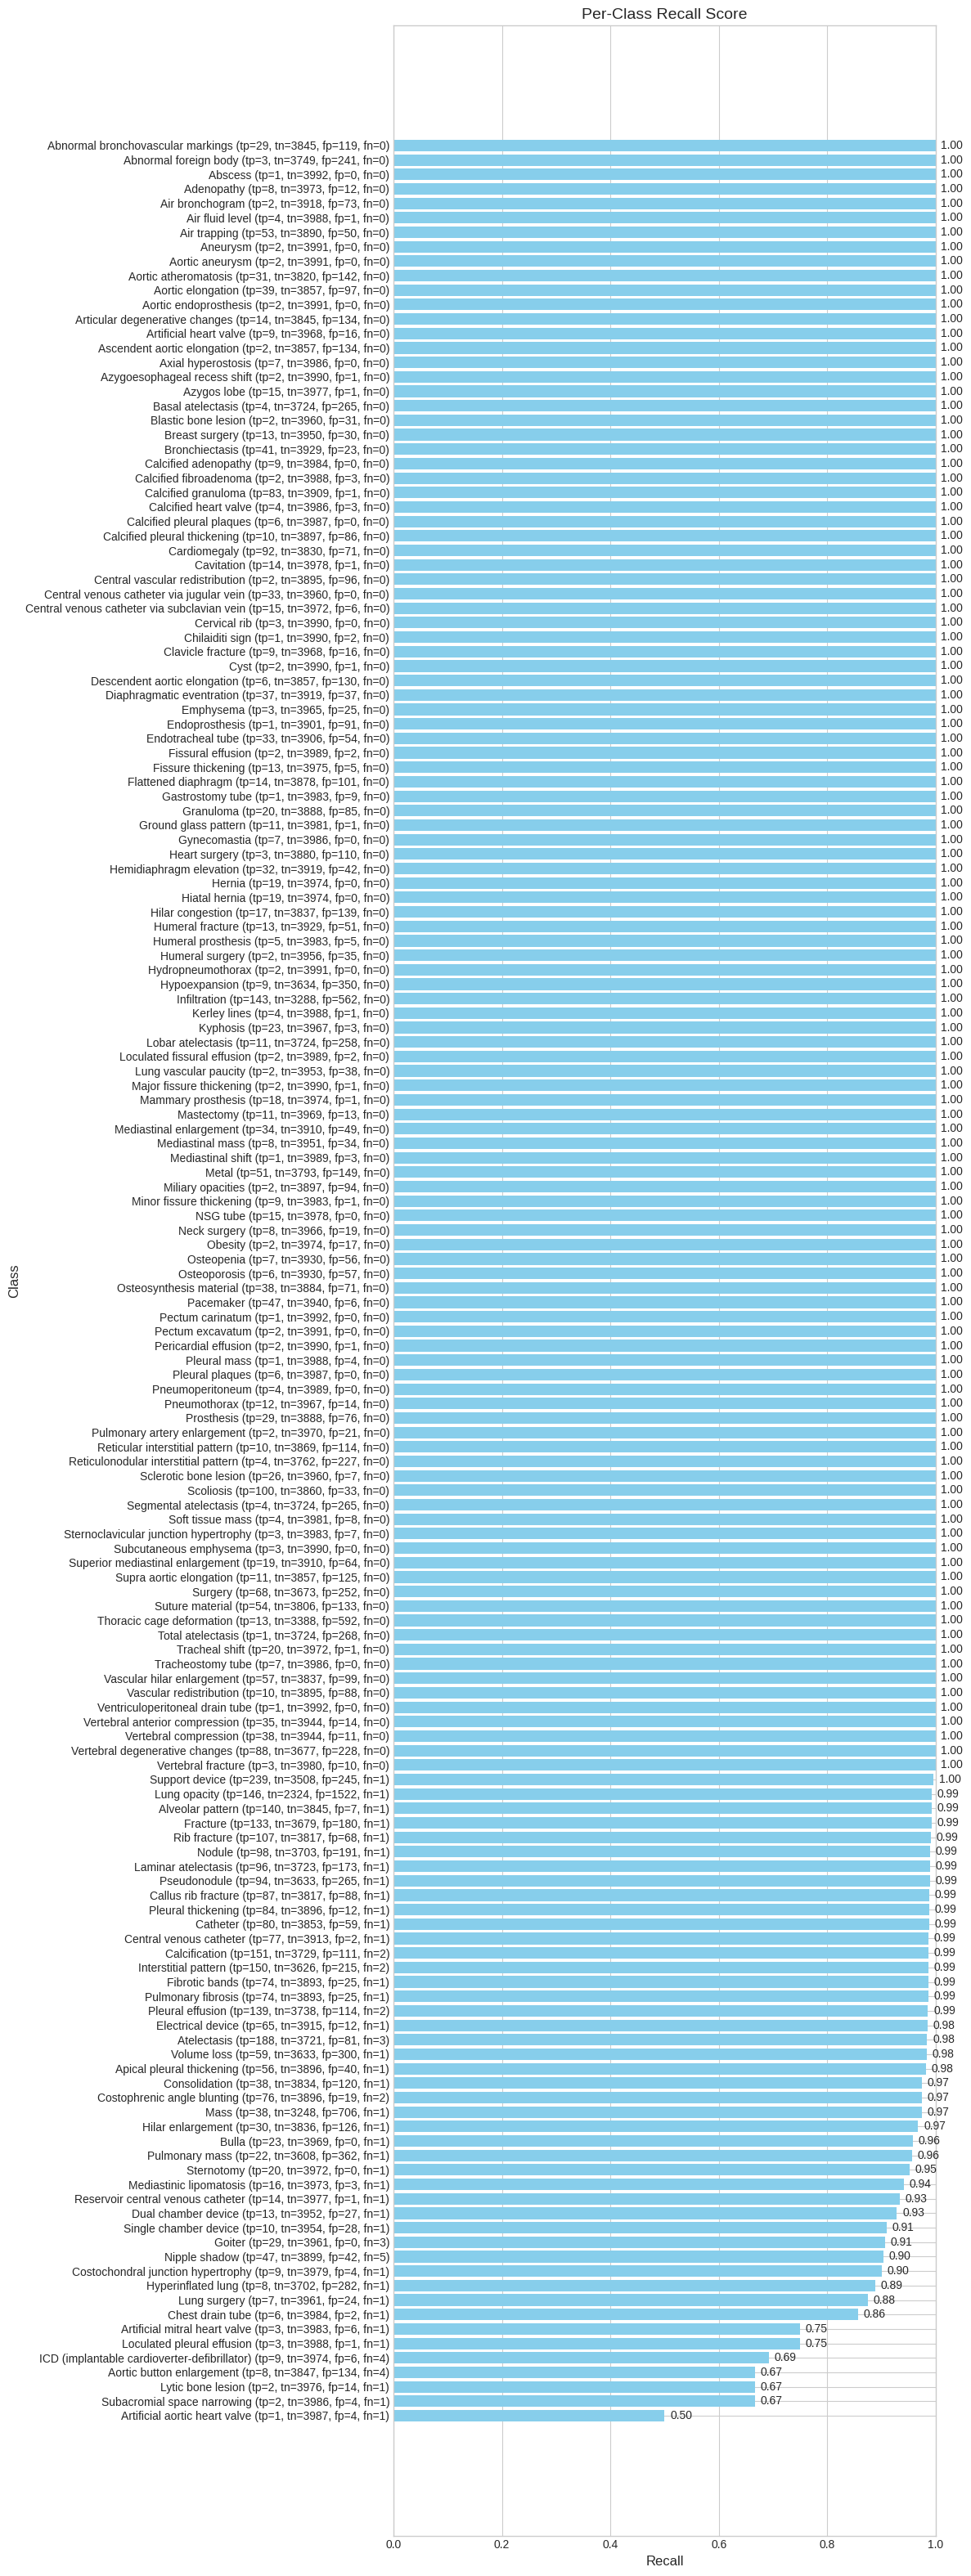

In [89]:
plot_classification_metric(
    padchest_gr_sentences,
    padchest_gr_sentence_to_expected_ucchristus_labels,
    padchest_gr_sentence_to_regex_ucchristus_labels,
    "recall"
)

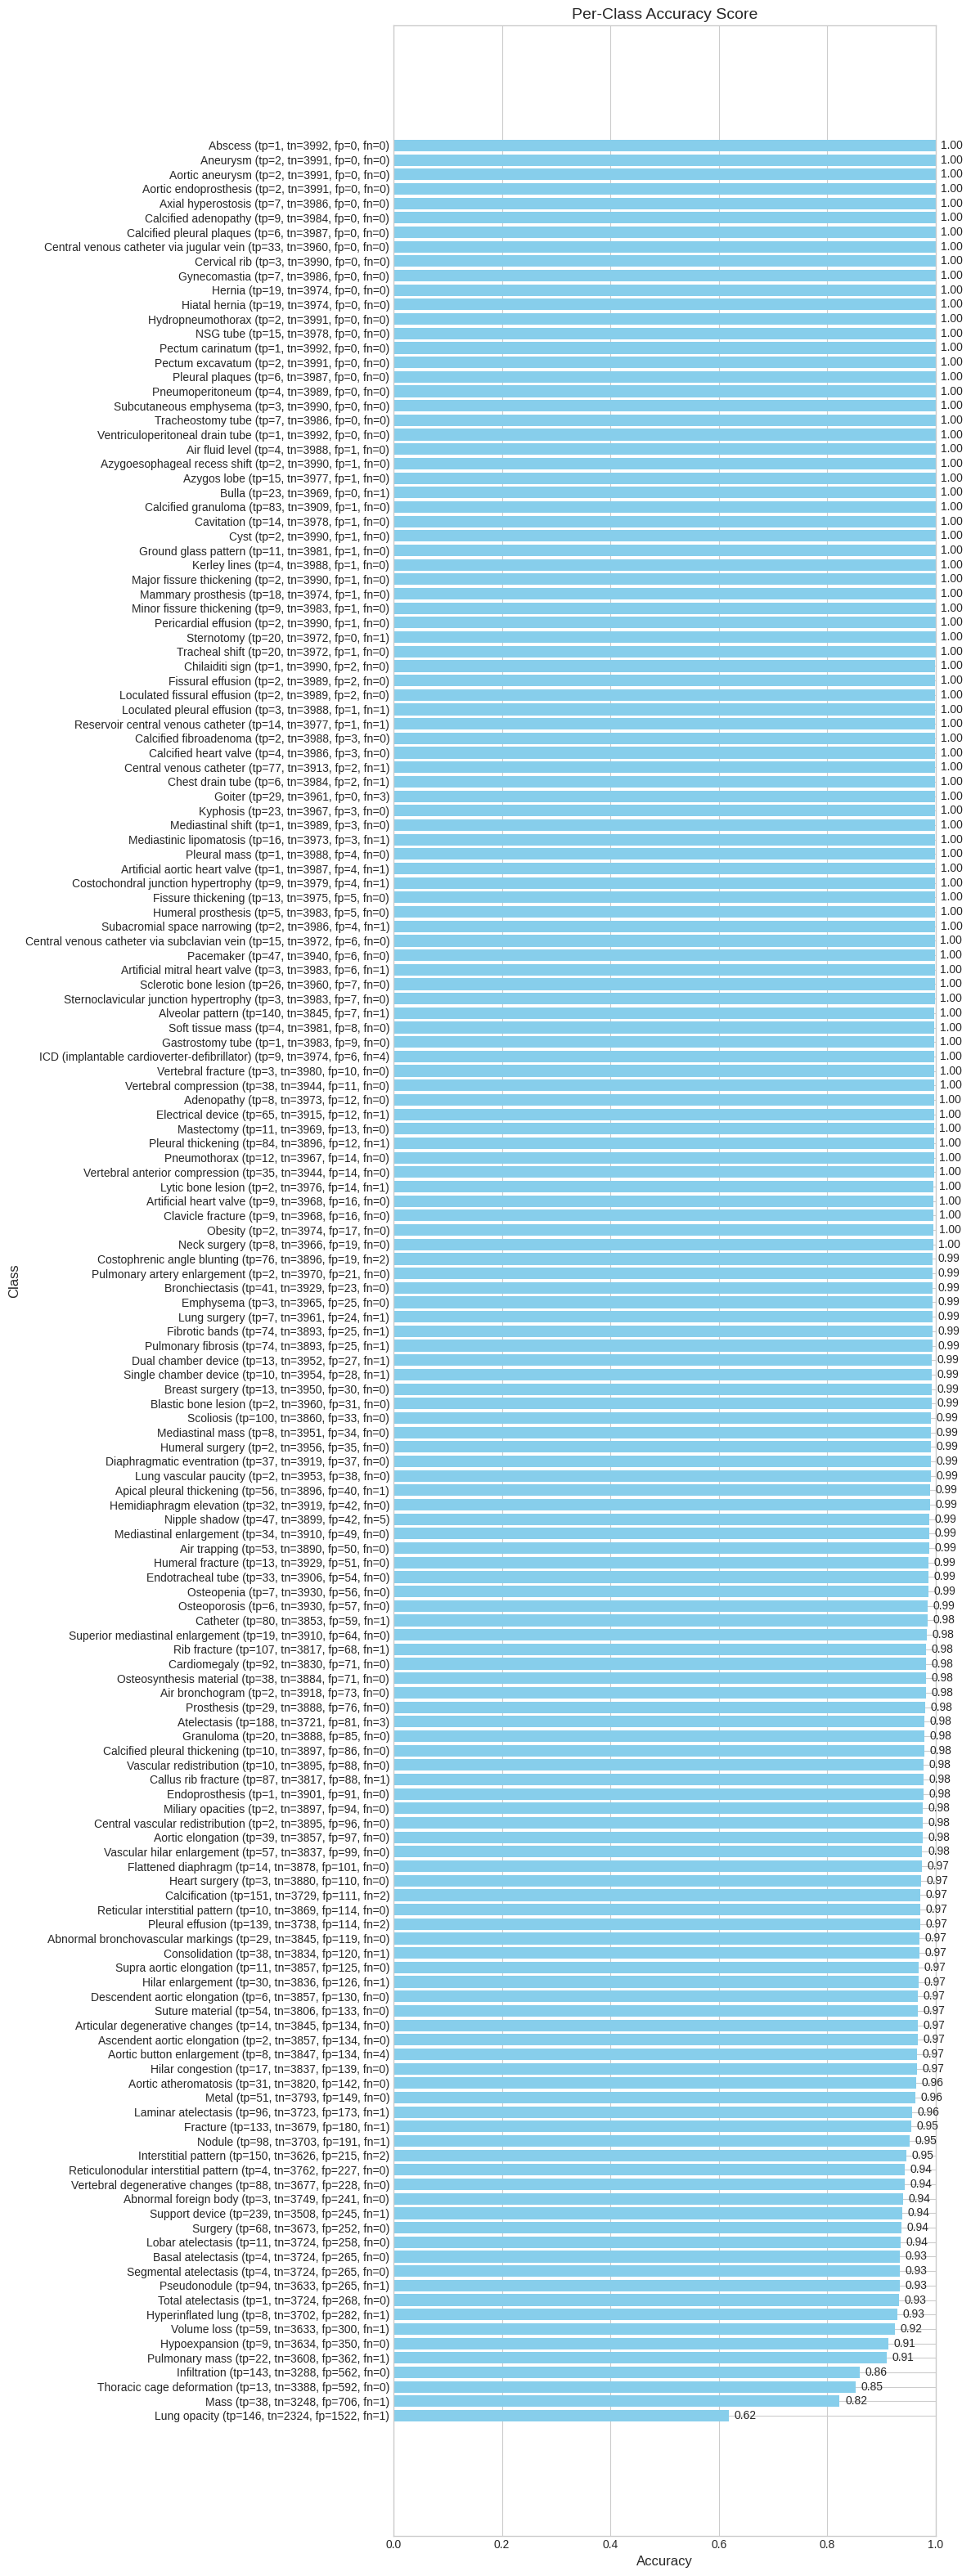

In [90]:
plot_classification_metric(
    padchest_gr_sentences,
    padchest_gr_sentence_to_expected_ucchristus_labels,
    padchest_gr_sentence_to_regex_ucchristus_labels,
    "accuracy"
)

In [53]:
def collect_false_negative_sentences(
    sentences: List[str],
    ground_truth_mapping: Dict[str, List[str]],
    predicted_mapping: Dict[str, List[str]],
    class_name: str,
) -> List[str]:
    """Finds sentences where a specific class was missed by the predictions.

    This function identifies false negatives for a given class. A false
    negative occurs when a label is present in the ground truth for a
    sentence but is absent from the model's predictions for that same
    sentence.

    Args:
        sentences: A list of the text samples that were classified.
        ground_truth_mapping: A dictionary mapping each sentence to a list
            of its correct class labels.
        predicted_mapping: A dictionary mapping each sentence to a list of
            its predicted class labels.
        class_name: The specific class to check for false negatives.

    Returns:
        A list of sentences that are false negatives for the given class.
        Returns an empty list if no such sentences are found.
    """
    false_negative_sentences = []

    for sentence in sentences:
        # Use .get() with a default empty list to prevent KeyErrors
        true_labels = ground_truth_mapping.get(sentence, [])
        pred_labels = predicted_mapping.get(sentence, [])

        # Check for the false negative condition
        if class_name in true_labels and class_name not in pred_labels:
            false_negative_sentences.append(sentence)

    return false_negative_sentences

In [54]:
missed_class = "Mastectomy"
fn_sentences = collect_false_negative_sentences(
    padchest_gr_sentences,
    padchest_gr_sentence_to_expected_ucchristus_labels,
    padchest_gr_sentence_to_regex_ucchristus_labels,
    missed_class
)

print(f"Sentences that are false negatives for the class '{missed_class}':")
if fn_sentences:
    for sentence in fn_sentences:
        print(f"- '{sentence}'")
        print(f"  - GT:      {padchest_gr_sentence_to_expected_ucchristus_labels.get(sentence)}")
        print(f"  - Pred:    {padchest_gr_sentence_to_regex_ucchristus_labels.get(sentence)}\n")
else:
    print("  None found.\n")

Sentences that are false negatives for the class 'Mastectomy':
  None found.



In [91]:
import re
from typing import Dict, List, Set, Union
import numpy as np
import pandas as pd
from tqdm import tqdm
import os

# A type alias for clarity in the function signature
PatternDefinition = Union[re.Pattern, List[Union[re.Pattern, str]]]

def create_report_labels_csv(
    original_reports: List[str],
    preprocessed_reports: List[str],
    report_paths: List[str],
    output_csv_path: str,
    class_to_regex_patterns: Dict[str, PatternDefinition],
    num_processes: int = 1
):
    """
    Applies regex patterns to reports and generates a CSV with binary labels.

    This function processes a list of reports, matches them against a
    hierarchical dictionary of regex patterns, and saves the results to a
    CSV file. The matching is performed on preprocessed text, but the
    original text is saved in the output.

    Args:
        original_reports: List of original report strings.
        preprocessed_reports: List of preprocessed (e.g., lowercase, no
            accents) report strings for regex matching.
        report_paths: List of file paths corresponding to each report.
        output_csv_path: Path to save the final CSV file.
        class_to_regex_patterns: A dictionary mapping class names to their
            regex definitions, which can be recursive.
        num_processes: Number of processes to use for parallel processing.
    """
    num_reports = len(original_reports)
    # Sort class names for consistent column order in the output CSV
    class_names = sorted(list(class_to_regex_patterns.keys()))
    num_classes = len(class_names)

    print(f"Found {num_reports} reports and {num_classes} classes.")

    # 1. Create a numpy matrix to store binary labels (rows=classes, cols=reports)
    # Using int8 is memory-efficient for binary 0/1 values
    labels_matrix = np.zeros((num_classes, num_reports), dtype=np.int8)
    class_match_cache = {}

    # 2. Fill the matrix row-wise (class by class) using the helper function
    print("Matching reports against class patterns...")
    for i, class_name in tqdm(
        enumerate(class_names), total=num_classes, desc="Processing classes"
    ):
        matching_indices = collect_reports_matching_class(
            reports=preprocessed_reports,
            class_name=class_name,
            class_match_cache=class_match_cache,
            class_to_regex_patterns=class_to_regex_patterns,
            num_processes=num_processes,
        )

        # Set the value to 1 for reports that matched the class
        if matching_indices:
            labels_matrix[i, matching_indices] = 1

    # 3. Build the final DataFrame and save it to CSV
    print("Constructing the final CSV file...")
    # Transpose the matrix so that rows are reports and columns are classes
    transposed_labels = labels_matrix.T

    # Create a dictionary to build the DataFrame
    data = {"report_text": original_reports, "report_path": report_paths}

    # Add the binary labels for each class
    for i, class_name in enumerate(class_names):
        data[class_name] = transposed_labels[:, i]

    df = pd.DataFrame(data)

    # Save to CSV
    df.to_csv(output_csv_path, index=False)
    print(f"Successfully created CSV at: {output_csv_path}")

In [93]:
create_report_labels_csv(
    original_reports=report_texts,
    preprocessed_reports=report_texts_no_accent_lower,
    report_paths=report_paths,
    output_csv_path="/home/pamessina/labeled_reports.csv",
    class_to_regex_patterns=class_to_regex_patterns,
    num_processes=10,
)    

Found 105213 reports and 177 classes.
Matching reports against class patterns...


Processing classes: 100%|█████████████████████████████████████████████████████████████| 177/177 [09:24<00:00,  3.19s/it]


Constructing the final CSV file...
Successfully created CSV at: /home/pamessina/labeled_reports.csv


In [95]:
!ls -lh "/home/pamessina/labeled_reports.csv"

-rw-rw-r-- 1 pamessina pamessina 134M Jun 29 11:22 /home/pamessina/labeled_reports.csv


In [96]:
df_result = pd.read_csv("/home/pamessina/labeled_reports.csv")
df_result

,report_text,report_path,Abnormal bronchovascular markings,Abnormal foreign body,Abscess,Adenopathy,Air bronchogram,Air fluid level,Air trapping,Alveolar pattern,...,Tracheostomy tube,Tuberculosis,Vascular hilar enlargement,Vascular redistribution,Ventriculoperitoneal drain tube,Vertebral anterior compression,Vertebral compression,Vertebral degenerative changes,Vertebral fracture,Volume loss
0,<FECHA> \nRADIOGRAFÍA DE TÓRAX PA Y LATERAL. ...,/mnt/nas_anakena/datasets/uc-cxr/processed_dat...,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
1,<FECHA> \nRADIOGRAFÍA DE TÓRAX AP PORTATIL \n<...,/mnt/nas_anakena/datasets/uc-cxr/processed_dat...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,<FECHA> \nRADIOGRAFÍA DE TÓRAX PA - LATERAL \n...,/mnt/nas_anakena/datasets/uc-cxr/processed_dat...,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,<FECHA> \nRADIOGRAFÍA DE TÓRAX PA - LATERAL \n...,/mnt/nas_anakena/datasets/uc-cxr/processed_dat...,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,<FECHA> \nRADIOGRAFÍA DE TÓRAX AP PORTÁTIL \n<...,/mnt/nas_anakena/datasets/uc-cxr/processed_dat...,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105208,<FECHA> \nRADIOGRAFÍA DE TÓRAX PA - LATERAL \n...,/mnt/nas_anakena/datasets/uc-cxr/processed_dat...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
105209,<FECHA> \nRADIOGRAFÍA DE TÓRAX PORTÁTIL AP \n1...,/mnt/nas_anakena/datasets/uc-cxr/processed_dat...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105210,<FECHA> \nRADIOGRAFÍA DE TÓRAX AP PORTÁTIL \n<...,/mnt/nas_anakena/datasets/uc-cxr/processed_dat...,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
105211,<FECHA> \nRADIOGRAFÍA DE TÓRAX AP PORTÁTIL \n<...,/mnt/nas_anakena/datasets/uc-cxr/processed_dat...,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [101]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_class_distribution_from_df(
    labels_df: pd.DataFrame,
    plot_title: str = "Class Distribution in Reports",
) -> None:
    """
    Analyzes and plots the class distribution from a labeled DataFrame.

    This function takes a DataFrame where each row is a report and columns
    represent binary class labels (0 or 1). It generates a horizontal bar
    plot showing the frequency and percentage of each class, sorted from
    most to least common.

    Args:
        labels_df: A pandas DataFrame with binary columns for each class.
            It is expected to have metadata columns 'report_text' and
            'report_path' which will be ignored.
        plot_title: The title for the generated plot.
    """
    if labels_df.empty:
        print("Warning: The provided DataFrame is empty. Nothing to plot.")
        return

    # 1. Identify class columns by excluding metadata columns
    metadata_cols = {"report_text", "report_path"}
    class_columns = [
        col for col in labels_df.columns if col not in metadata_cols
    ]

    if not class_columns:
        print("Warning: No class columns found in the DataFrame. Nothing to plot.")
        return

    # 2. Calculate counts by summing the binary columns and sort them
    # This is highly efficient as it's a single pandas operation.
    class_counts = labels_df[class_columns].sum().sort_values(ascending=False)
    total_reports = len(labels_df)

    # 3. Prepare data for plotting
    # Create formatted labels for the y-axis and get the corresponding counts
    plot_labels = []
    plot_values = []
    for class_name, count in class_counts.items():
        percentage = (count / total_reports) * 100
        label = f"{class_name} (n={count}, {percentage:.1f}%)"
        plot_labels.append(label)
        plot_values.append(count)

    num_classes = len(plot_labels)

    # 4. Generate the horizontal bar plot
    plt.style.use("seaborn-v0_8-whitegrid")
    fig, ax = plt.subplots(figsize=(12, max(6, num_classes * 0.2)))

    ax.barh(plot_labels, plot_values, color="mediumseagreen")
    ax.set_xlabel("Number of Reports", fontsize=12)
    ax.set_ylabel("Class", fontsize=12)
    ax.set_title(plot_title, fontsize=14)

    # Set x-axis limit to give space for the text labels on the bars
    ax.set_xlim(0, max(plot_values) * 1.15)

    # Add the count label on each bar
    for index, value in enumerate(plot_values):
        ax.text(
            value + (max(plot_values) * 0.01),
            index,
            f"{value}",
            va="center",
            fontsize=10,
        )

    # Invert y-axis to have the highest value on top
    ax.invert_yaxis()
    plt.tight_layout()
    plt.show()

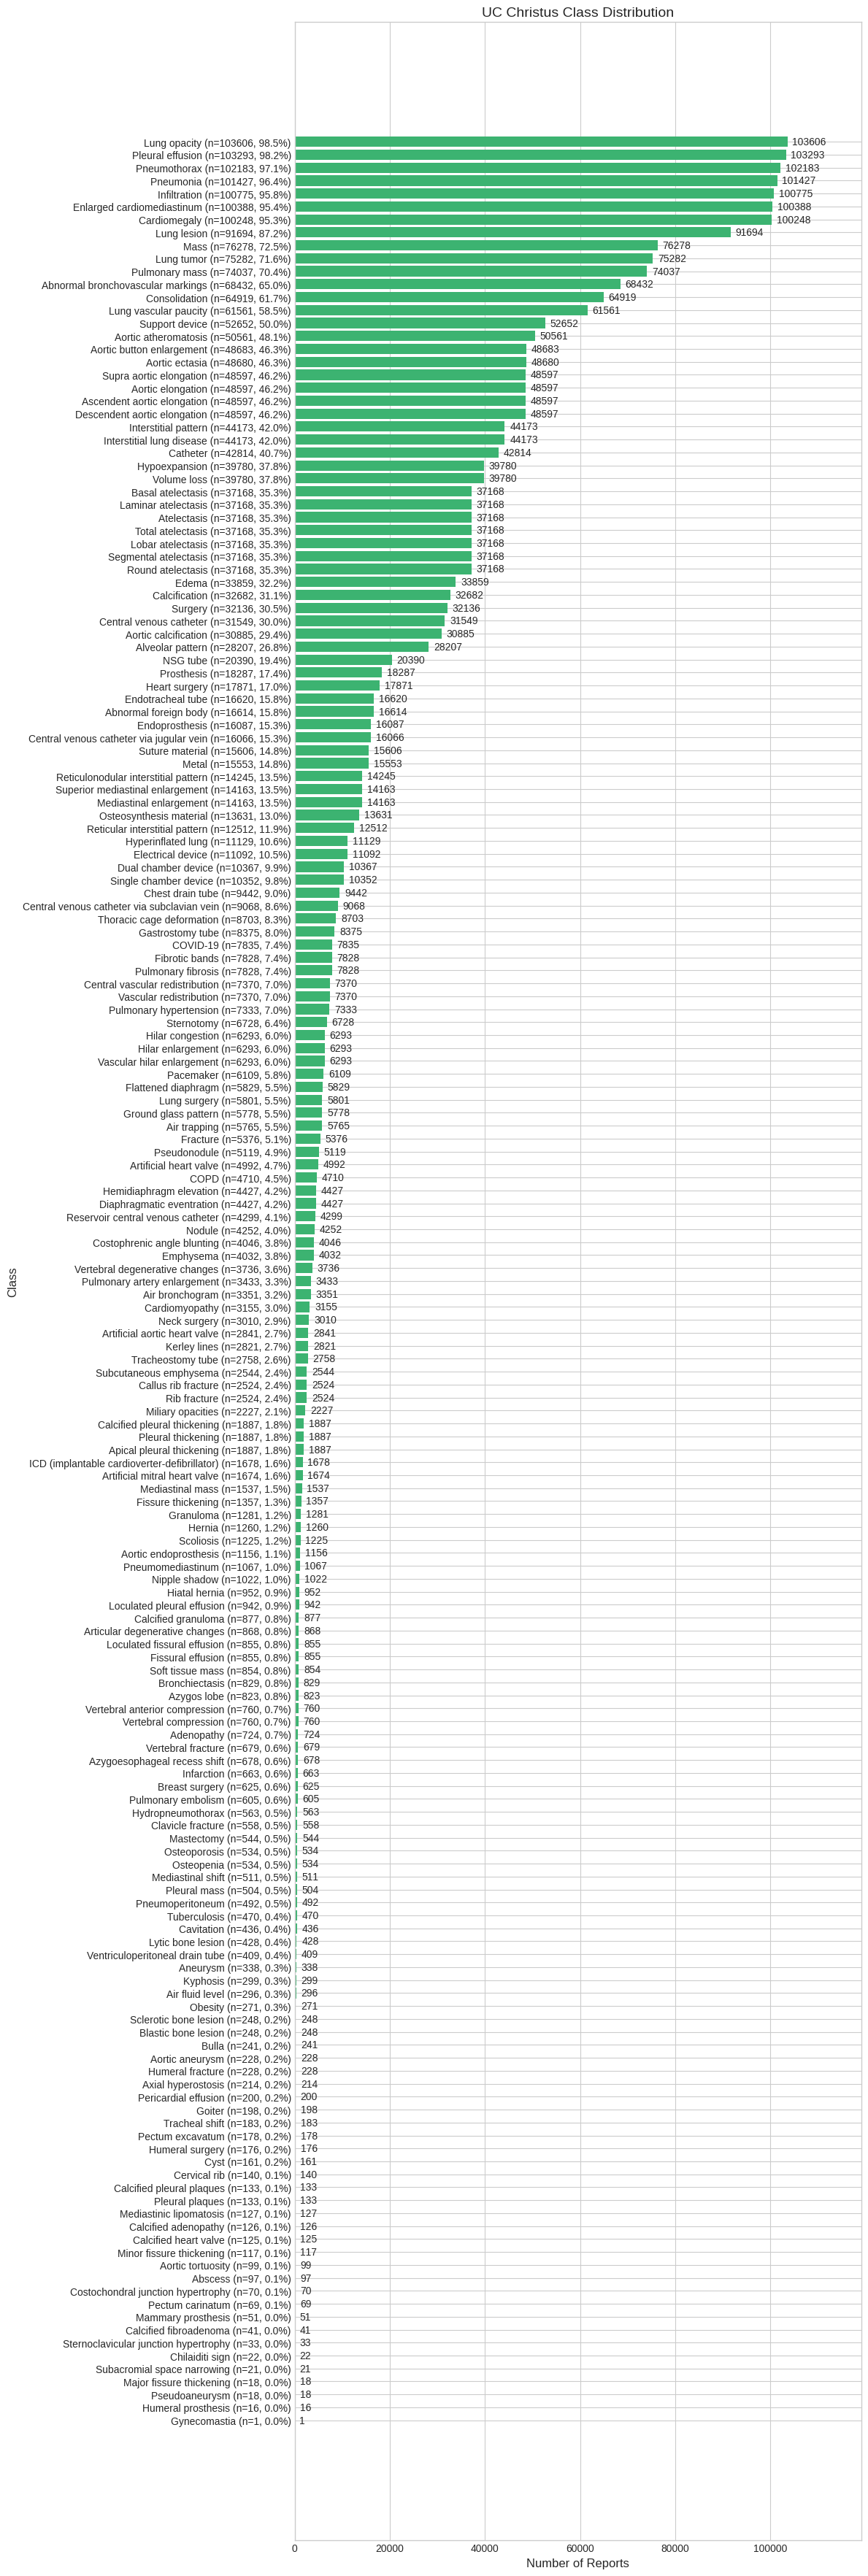

In [103]:
plot_class_distribution_from_df(
    df_result,
    plot_title="UC Christus Class Distribution",
)